<a href="https://colab.research.google.com/github/Hokaid/PLN-and-Machine-learning-to-identify-positive-reviews/blob/master/Examen_Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Enlace Online***

**[Link de Acceso](https://colab.research.google.com/drive/1DXnNVgUVeP6DV8FLYqRjnvfysSX8VSQw?usp=sharing)**

#***Alumnos***

- ***Geral Esteen Castillo Arredondo U201716913***

- ***Javier Arturo Rozas Acurio U201711814***

#***Videos***

***Video de Javier:*** **[Video en Loom](https://www.loom.com/share/d481822e30fc4dd9a85f81db37c1f19c)**

***Video de Geral:*** **[Video en Loom](https://www.loom.com/share/63bf3107d76b417d8d4d39743f75a1fc)**










#***I. Procesamiento de Corpus***

##***1. Lectura de datos***

En esta parte, se procede a realizar la lectura respectiva de los datos correspondiente a los textos a utilizar en el presente trabajo. 

In [ ]:
#Leer un CSV 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

En el siguiente codigo, es factible observar la lectura del archivo de texto ***rgdata.txt***. Este archivo contiene los textos que seran descritos y procesados posteriormente. 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import data_table
from bs4 import BeautifulSoup
import urllib.request

link_google_drive = 'https://drive.google.com/open?id=1Bl2iiO5WIRnSjnbqEA1v6TcuOXKYOTWB'
flu, id = link_google_drive.split('=')
dataset = drive.CreateFile({'id':id})
dataset.GetContentFile('rgdata.txt')
f = open('rgdata.txt', 'r')
soup = BeautifulSoup(f,'html5lib')
texto = soup.get_text(strip=True)
f.close()

##***2. Descripción de los datos***

***Contexto de los datos:*** Para obtener los datos anteriormente leidos, se realizo un proceso de extracción de textos. Estos textos son correspondientes a reseñas de videojuegos. Se ingreso a una pagina en la que tanto criticos profesionales como fanaticos pueden realizar reseñas a sus videojuegos favoritos. Por lo tanto, dichas reseñas fueron extraidas y ***etiquetadas*** como ***Positivo*** o ***Negativo*** dependiendo si la reseña extraida era positiva o negativa. El archivo leido anteriormenete contiene más de ***150*** textos de reseñas etiquetadas apropiadamente.  

Ahora bien, se procedera a definir las caracteristicas y clase o etiqueta respectiva a los datos recolectados:

***Caracteristicas***

* ***Texto de reseña:*** Se compone de un texto, el cual contiene información respecto a la reseña de un videojuego. La reseña puede ser ***positiva*** o ***negativa***. 

***Atributo clase o objetivo***

* ***Tipo de reseña:*** En este caso, respecto al texto descrito anteriormente, esta etiqueta define si se trata de una reseña ***negativa*** o ***positiva***. 

##***3. Análisis exploratorio del texto***

###***A. Impresión y visualización del texto***

A continuación, se procede a importar y descargar una libreria muy util para el ***Procesamiento de Lenguaje Natural (PLN)***. Esta libreria se llama ***nltk***. 

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

Ahora bien, en esta parte, se procede a imprimir el texto y la clase o etiqueta respectiva, con el objetivo de conocer las propiedades de los datos. En el siguiente codigo, se define la función ***imprimir_texto***, la cual posee la capacidad de imprimir los textos junto a su clase respectiva.

In [ ]:
def imprimir_texto(texto,num_char=10):
  i = 1
  for x in texto.split('\n'):
    cadena, clase = x.split('----->')
    print('{}\t{}\t{}'.format(i, cadena[:num_char], clase))
    i+=1

In [ ]:
imprimir_texto(texto, 100)

1	Este juego tiene todo lo que puedes pedir en un juego Iron Man VR	Positivo
2	Este es uno de los mejores juegos de PSVR que he jugado	Positivo
3	Muy buena experiencia de juego y diversión te está esperando	Positivo
4	Increíble juego, me encanta la historia y el personaje	Positivo
5	Increíble no solo para los amantes occidentales	Positivo
6	Con su increíble historia de mundo abierto, bien escrita y personajes profundos, Red Dead Redemption	Positivo
7	Este juego es una obra maestra de la narración de cuentos, recomiendo a cualquiera con Ps4 que juegu	Positivo
8	El nuevo comienzo de Kratos está lleno de corazón, cargado de acción y es fácilmente uno de los mejo	Positivo
9	Una expansión excepcionalmente buena que agrega una montaña de contenido nuevo que aborda específica	Positivo
10	La naturaleza del nuevo Hitman está bien establecida, las tareas siempre están bien hechas y son muy	Positivo
11	Los episodios más recientes continúan con la mejora constante de la calidad de Hitman. Marrakec

###***B. Separación de Texto y Etiqueta***

A continuación se procede a instalar la libreria ***spicy***, la cual presenta herramientas muy interesantes para el ***Procesamiento de Lenguaje Natural (PLN)***.

In [ ]:
!pip install spicy

In [ ]:
import spacy
spacy.cli.download('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
nlp = spacy.load('es_core_news_md')

En el siguiente codigo, se define la función ***extraer_texto***, la cual sirve para separar los textos de su etiqueta respectiva. La división se realiza por medio del siguiente conjunto de caracteres: ***----->***. 

In [ ]:
def extraer_texto(texto):
  X_cadenas = []
  Y_cadena = []
  textoSalida = ''
  for x in texto.split('\n'):
    cadena, clase = x.split('----->')
    textoSalida += cadena + " "
    Y_cadena.append(clase)
    X_cadenas.append(cadena)
  return textoSalida, X_cadenas, Y_cadena

In [ ]:
texto, X_cadenas, Y_cadena = extraer_texto(texto)

Ahora bien, una vez separados el texto de la etiqueta asociada, se procede a imprimir el arreglo con todas las etiquetas respectivamente almacenadas. 

In [ ]:
print(Y_cadena)
print(len(Y_cadena))

['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Ne

En ese sentido, tambien se procede a imprimir el arreglo con todas los textos respectivamente almacenados.

In [ ]:
print(X_cadenas)
print(len(X_cadenas))

['Este juego tiene todo lo que puedes pedir en un juego Iron Man VR', 'Este es uno de los mejores juegos de PSVR que he jugado', 'Muy buena experiencia de juego y diversión te está esperando', 'Increíble juego, me encanta la historia y el personaje', 'Increíble no solo para los amantes occidentales', 'Con su increíble historia de mundo abierto, bien escrita y personajes profundos, Red Dead Redemption II es una montaña rusa llena de emociones', 'Este juego es una obra maestra de la narración de cuentos, recomiendo a cualquiera con Ps4 que juegue este juego', 'El nuevo comienzo de Kratos está lleno de corazón, cargado de acción y es fácilmente uno de los mejores juegos de esta generación', 'Una expansión excepcionalmente buena que agrega una montaña de contenido nuevo que aborda específicamente los pocos defectos que había con el original', 'La naturaleza del nuevo Hitman está bien establecida, las tareas siempre están bien hechas y son muy divertidas de jugar', 'Los episodios más recien

Por utlimo, se imprime un texto entero con todos los textos unificados. Es importante tener una sola ***cadena*** con todos los textos, ya que ello facilita el análisis respecto a ***tokens*** que se realizará´posteriormente. 

In [ ]:
print(texto)
doc = nlp(texto)

Este juego tiene todo lo que puedes pedir en un juego Iron Man VR Este es uno de los mejores juegos de PSVR que he jugado Muy buena experiencia de juego y diversión te está esperando Increíble juego, me encanta la historia y el personaje Increíble no solo para los amantes occidentales Con su increíble historia de mundo abierto, bien escrita y personajes profundos, Red Dead Redemption II es una montaña rusa llena de emociones Este juego es una obra maestra de la narración de cuentos, recomiendo a cualquiera con Ps4 que juegue este juego El nuevo comienzo de Kratos está lleno de corazón, cargado de acción y es fácilmente uno de los mejores juegos de esta generación Una expansión excepcionalmente buena que agrega una montaña de contenido nuevo que aborda específicamente los pocos defectos que había con el original La naturaleza del nuevo Hitman está bien establecida, las tareas siempre están bien hechas y son muy divertidas de jugar Los episodios más recientes continúan con la mejora cons

##***4. Análisis de tokens***

###***A. Aplicación de Lematización***

La tecnica de ***lematización*** consiste en extraer los ***tokens*** que representen un conjunto de palabras en su sentido neutro. ***Mezclar***, por ejemplo, representa ***mezcla*** y ***mezclando***. El objetivo de esta tecnica es reducir la cantidad de ***tokens*** a analizar posteriormente. La idea es quedarse solo con los ***tokens*** más relevantes. 

In [ ]:
tokens = []
for token in doc:
  print(token.text + ' ----> ' + token.lemma_)
  tokens.append(token.lemma_)

Se han truncado las últimas 5000 líneas del flujo de salida.
un ----> uno
área ----> área
de ----> de
juegos ----> juego
aún ----> aun
más ----> más
grande ----> grande
e ----> e
impresionante ----> impresionante
con ----> con
mucha ----> mucho
más ----> más
libertad ----> libertar
de ----> de
acción ----> acción
, ----> ,
al ----> al
tiempo ----> tiempo
que ----> que
presenta ----> presentar
un ----> uno
desafío ----> desafiar
mayor ----> mayor
Persona ----> Persona
5 ----> 5
ya ----> ya
era ----> ser
un ----> uno
líder ----> líder
fuerte ----> fuerte
por ----> por
ser ----> ser
el ----> el
mejor ----> mejor
JRPG ----> JRPG
jamás ----> jamás
creado ----> crear
, ----> ,
y ----> y
Royal ----> Royal
realmente ----> realmente
me ----> me
hace ----> hacer
preguntarme ----> preguntarme
qué ----> qué
más ----> más
podría ----> poder
incluso ----> incluso
competir ----> competir
Bellamente ----> Bellamente
mejorado ----> mejorar
y ----> y
, ----> ,
en ----> en
su ----> su
esencia ----> esenc

A continuación se imprimen cuantos ***tokens*** quedan por analizar. Como resultado de la tecnica de ***lematización***, ahora se podra realizar el análisis respecto a las ***5182*** palabras restantes. 

In [ ]:
len(tokens)

5182

###***B. Eliminación de tokens irrelevantes***

En el siguiente codigo, se procedera a eliminar aquellos ***tokens*** que no sean palabras como tal, es decir, se eliminan signos de puntuación, caracteres raros, entre otros. 

In [ ]:
tokens = [w.lower() for w in tokens if w.isalpha()]
len(tokens)

4688

Llegados a este punto, se muestra el grafico de las primeras ***30*** palabras que más se repiten o que poseen mayor frecuencia en el texto. Como se puede observar, aun existen multiples palabras muy irrelevantes, tales como ***de***, ***el***, ***y***, ***con***, ***a***, etc. 

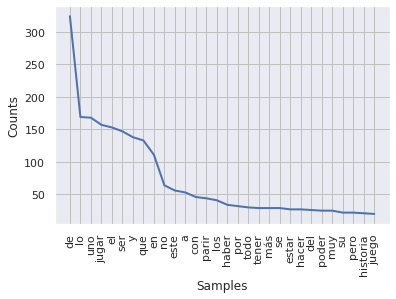

In [ ]:
import seaborn as sns
sns.set()
freq = nltk.FreqDist(tokens)
freq.plot(30, cumulative = False)

El tipo de palabras como las mencionadas anteriormente, las cuales son las más predominantes en el gráfico anterior, se denominan ***stop words***. Se trata de palabras que se usan muy seguido, y son irrelevantes en su totalidad en casi cualquier contexto. Por lo tanto, en el siguiente codigo, dichas palabras proceden a ser eliminadas del conjunto de ***tokens*** manejado. 

In [ ]:
tokens2 = tokens[:]
for token in tokens:
  if nlp.vocab[token].is_stop == True:
    tokens2.remove(token)

A cotninuación, se imprime, en primer lugar, la cantidad de ***tokens*** considerando ***stop words***. Luego de ello, se muestra la cantidad de ***tokens*** sin considerar ***stop words***. En ese sentido, es factible argumentar que la eliminación de ***stop words*** ha reducido casi a la mitad la cantidad de ***tokens*** que quedan por analizar. 

In [ ]:
print(len(tokens))
print(len(tokens2))

4688
2368


Continuando con el asunto, se muestra el grafico de las primeras ***30*** palabras que más se repiten o que poseen mayor frecuencia en el texto. Como se puede observar, aun existen palabras irrelevantes, tales como ***y***, ***a***, ***jugar***, etc. 

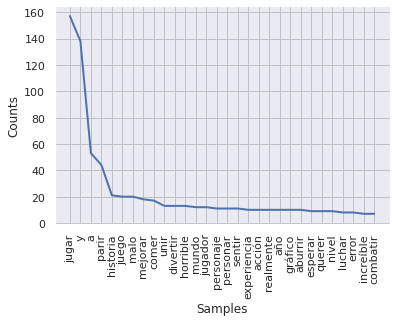

In [ ]:
freq = nltk.FreqDist(tokens2)
freq.plot(30, cumulative = False)

En el siguiente codigo, se indican las palabras irrelevantes a considerar en un arreglo. Posteriormente, estas palabras son eliminadas del conjunto de ***tokens*** analizados. 

In [ ]:
palabras_irrelavantes = ['y', 'a', 'o', 'de','jugar','juego','divertir','jugador','personaje','experiencia','sentir','acción','nivel','luchar','combatir',
                         'the','parir','comer','gráfico','predator','e','doom','original','episodio','ofrecer','historia','unir','mundo','realmente',
                         'personar','año','querer','armar','seriar','crear','franquicia','sobrar','simplemente','multijugador','entrar','golf','hora',
                         'abrir','comenzar','generación','presentar','jrpg','parecer','secuela','literalmente','diseñar','tomar','elemento','entender',
                         'seguir','probablemente','explorar','equipar']
tokens = tokens2[:]
for token in tokens2:
  if token in palabras_irrelavantes:
    tokens.remove(token)

Renaudando el tema, se muestra el grafico de las primeras ***30*** palabras que más se repiten o que poseen mayor frecuencia en el texto. Como se puede observar, muchas palabras irrelevantes han sido eliminadas y ya no se muestran en las ***30*** más frecuentes. Además, se procede a imprimir el numero de ***tokens*** restantes, luego de aplicadas las eliminaciones y tratamientos anteriores. En este caso, el numero que se imprime es ***1589***. 

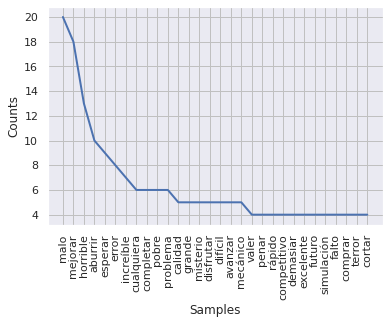

Numero de tokens restantes: 1589


In [ ]:
freq = nltk.FreqDist(tokens)
freq.plot(30, cumulative = False)
print("Numero de tokens restantes:", len(tokens))

##***5. Aplicación de Bag of Words***

El codigo que se muestra a continuación posee como principal funcionalidad imprimir en pantalla los ***150 tokens*** más frecuentes en los textos analizados. Una vez imprimidas las palabras, estas son seleccionadas y agrupadas con el objetivo de crear ***tokens*** agrupadores, y construir un vector de caracteristicas para cada texto, a partir de ello. 

In [ ]:
for t, val in freq.most_common(150):
  print(str(t) + '\t\t' + str(val))

malo		20
mejorar		18
horrible		13
aburrir		10
esperar		9
error		8
increíble		7
cualquiera		6
completar		6
pobre		6
problema		6
calidad		5
grande		5
misterio		5
disfrutar		5
difícil		5
avanzar		5
mecánico		5
valer		4
penar		4
rápido		4
competitivo		4
demasiar		4
excelente		4
futuro		4
simulación		4
falto		4
comprar		4
terror		4
cortar		4
físico		4
correr		4
estrategia		4
asir		4
obtener		4
supervivencia		4
vestir		4
enemigo		4
completamente		4
terrible		4
mediocre		4
extremadamente		4
deber		4
pedir		3
vr		3
lleno		3
llenar		3
cargar		3
contener		3
persona		3
escuela		3
cambiar		3
disparo		3
nivelar		3
refinar		3
doceno		3
superar		3
fps		3
músico		3
principiar		3
rompecabezas		3
coser		3
vida		3
absoluto		3
aspecto		3
viejo		3
emoción		3
lanzamiento		3
rol		3
cercano		3
oscuro		3
aventurar		3
universo		3
guerra		3
atmósfera		3
real		3
impulsar		3
fanático		3
alto		3
volver		3
océano		3
papel		3
basar		3
tercero		3
stab		3
enfrentar		3
amigo		3
campar		3
principal		3
creer		3
importante

A continuación, se definen apropiadamente los grupos de ***tokens***, los cuales van a representar columnas o ***caracteristicas*** en el conjunto de datos que se construira posteriormente. ***cambios***, ***gamefeats***, ***costos***, ***extremas***, ***buenas***, ***malas*** serán los nombres de las ***caracteristicas*** del conjunto de datos a construir, el cual servira para representar los textos y sus etiquetas respectivas. Cada uno de los grupos definidos representan un aspecto importante: ***cambios*** representa las palabras que indiquen que se debe cambiar algo, ***gamefeats*** hace referencia a las caracteristicas de un juego, ***costos*** representa palabras relacionadas con dinero, ***extremas*** se refiere a palabras que tratan de exaltar algo, ***buenas*** trata sobre palabras que indiquen cualidades buenas y ***malas*** aborda palabras sobre cualidades malas. 

In [ ]:
cambios = ['mejorar','avanzar','completar','cortar','contener','cambiar','superar','impulsar', 'refinar','incluir']
gamefeats = ['mecánico','rápido','competitivo','difícil']
costos = ['comprar','preciar','dinero']
extremas = ['extremadamente','completamente','lleno','llenar','absoluto']
buenas = ['increíble', 'grande', 'disfrutar', 'valer', 'excelente', 'emoción', 'alto', 'importante', 'bellamente', 'fantástico', 'sorprendente', 
          'imprescindible', 'altura', 'genial', 'diversión']
malas = ['malo', 'horrible', 'aburrir', 'esperar', 'error', 'pobre', 'problema', 'difícil', 'falto', 'terrible', 'mediocre', 'viejo', 'siquiera',
         'repetitivo', 'arruinar', 'malgastar', 'decepcionar', 'defecto', 'fallo']

Ahora bien, se procedera a la construcción del conjunto de datos planteado. Este conjunto servira para representar los ***150*** textos análizados. Cada texto estará representado por ***7*** columnas. Las primeras ***6*** columnas son las ***caracteristicas***, mientras que la ultima corresponde a la ***clase***. Cada columna ***caracteristica*** hace referencia a un grupo de ***tokens*** definido en el codigo anterior. Esto es así, ya que las columnas solo tendran ***2*** posibles valores ***(0 o 1)***. El valor debe ser ***0*** si el texto no contiene ninguna palabra del arreglo o grupo al que la columna hace referencia y ***1*** en caso contrario. La columna ***clase*** indica si el texto corresponde a una reseña ***positiva*** o ***negativa***. En el siguiente codigo, se definen los valores que tendra cada columna en el conjunto de datos. 

In [ ]:
numi = len(X_cadenas)

dcambios = [0 for i in range(numi)]
dgamefeats = [0 for i in range(numi)]
dcostos = [0 for i in range(numi)]
dextremas = [0 for i in range(numi)]
dbuenas = [0 for i in range(numi)]
dmalas = [0 for i in range(numi)]
dclase = [0 for i in range(numi)]

for i in range(numi):
  doc = nlp(X_cadenas[i])
  for token in doc:
    if token.lemma_ in cambios:
      dcambios[i] = 1
    if token.lemma_ in gamefeats:
      dgamefeats[i] = 1
    if token.lemma_ in costos:
      dcostos[i] = 1
    if token.lemma_ in extremas:
      dextremas[i] = 1
    if token.lemma_ in buenas:
      dbuenas[i] = 1
    if token.lemma_ in malas:
      dmalas[i] = 1

for i in range(numi):
  if Y_cadena[i] == 'Positivo':
    dclase[i] = 1
  elif Y_cadena[i] == 'Negativo':
    dclase[i] = 0

Por ultimo, se procede a la construcción final del conjunto de datos, representando el mismo como un ***Dataframe***. Asimismo, se imprimen los ***5*** primeros registros del conjunto resultante. 

In [ ]:
dict = {'cambios': dcambios, 'gfeats': dgamefeats, 'costos': dcostos,'extremas': dextremas, 'buenas': dbuenas, 'malas': dmalas, 'clase': dclase}
df = pd.DataFrame(dict) 
df.head()

,cambios,gfeats,costos,extremas,buenas,malas,clase
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1
2,0,0,0,0,1,1,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


##***6. Etiquetado con Aprendizaje no supervisado (K-means)***

En esta parte, se plantea el uso de ***aprendizaje no supervisado*** para caracterizar el conjunto de datos. Se busca realizar el etiquetado de ***100*** textos. El algoritmo que se utilizará sera ***K-means***. En el siguiente codigo, se aplica la tecnica de mencionada sobre el conjunto de datos. Los datos son separados en caracteristicas y columna objetivo respectivamente. Con ***K-means*** se pueden generar grupos o clusters en los datos, es decir, se pueden separar los datos dados un numero de clusters a generar. En este caso, se indica la generación de ***2*** clusters.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = df.iloc[25:125,:-1].values #Caracteristicas
Y = df.iloc[25:125,-1].values #Columna objetivo

km = KMeans(n_clusters=2) #Aplicación de K-means
km.fit(X)
y_km = km.predict(X)

Ahora bien, en el siguiente codigo, se procede a comparar el etiquetado original de los datos con el etiquetado dado por ***K-means***. El primer arreglo impreso corresponde al etiquetado original, mientras que el ultimo corresponde al etiquetado dado por el algoritmo de ***aprendizaje no supervisado***. Es factible observar que, si bien hay varios valores que no coinciden, los grupos estimados por ***K-means*** se aproximan bastante a los originales. Cabe mencionar que ***1*** indica grupo de reseñas positivas y ***0*** indica grupo de reseñas negativas. 

In [ ]:
print(Y)
print(y_km)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0]


Llegados a este punto, se indica la ***exactitud*** obtenida por el etiquetado de ***K-means***. En otras palabras, el valor que se indica a continuación se refiere al porcentaje de coincidencias alcanzadas, por el algoritmo de ***aprendizaje no supervisado***, respecto al total de textos etiquetados. Cabe mencionar que se trata de ***no supervisado***, es decir, no se tuvo referencia alguna sobre el etiquetado original de los datos. No obstante, a pesar de ello, se logro un porcentaje de exactitud relativamente alto. 

***Conclusión: El etiquetado de textos, en este caso, con K-means logro ser efectivo alcanzando una exactitude de 81%.***

In [ ]:
coinci = 0
for i in Y==y_km:
  if i == True:
    coinci+=1
print("Exactitud del etiquetado de K-means:", coinci/len(y_km))

Exactitud del etiquetado de K-means: 0.81


Avanzando en el tema, se procede a mostrar un grafico con la ***clusterización*** dada por ***K-means***. En este caso, se trata de un gráfico de dispersión entre el atributo ***Buenas*** y el atributo ***Malas***. Notese que el gráfico no es del todo llamativo, puesto que las ***caracteristicas*** solo toman valores de ***0*** o ***1***. Sin embargo, la agrupación respecto a los colores es apreciable. 

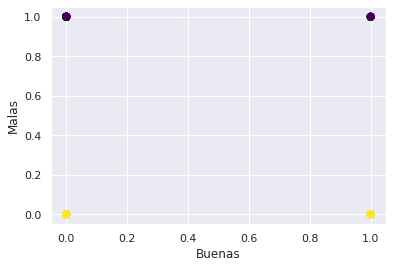

In [ ]:
plt.scatter(X[:,4], X[:,5], c=y_km, s=50, cmap='viridis')
plt.xlabel("Buenas")
plt.ylabel("Malas")
plt.show()

#***II. Preprocesamiento de datos***

##***1. Transformación de datos***

###***A. Evaluación para normalización o estandarización de datos***

####***A.1. Aplicación de normalización***

En el siguiente codigo, se aplica **normalización** sobre todos los datos del conjunto, excepto aquellos que correspondan a la columna clase. ***Esta parte del codigo no es del todo generica***, esto sucede, ya que se debe indicar el indice de la columna objetivo o clase. Luego de aplicar la tecnica, se imprime una descripción del conjunto de datos. ***Esta descripción muestra que todos los atributos poseen un rango de [0, 1]***.

In [ ]:
#Normalización de datos del dataset
ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
names = df.columns.values #Guardando el nombre de las columnas del dataset en un arreglo
dfn = df.copy()
for i in range(len(names)):
  if i != ind_clase:
    dfn[names[i]] = (df[names[i]] - df[names[i]].min())/ (df[names[i]].max()-df[names[i]].min())
dfn.describe()

,cambios,gfeats,costos,extremas,buenas,malas,clase
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.263158,0.111842,0.065789,0.092105,0.210526,0.427632,0.500000
std,0.441803,0.316214,0.248733,0.290130,0.409030,0.496371,0.501653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####***A.2. Aplicación de estandarización***

En el siguiente codigo, se aplica **estandarización** sobre todos los datos del conjunto, excepto aquellos que correspondan a la columna clase o objetivo. ***Esta parte del codigo no es del todo generica***, esto sucede, ya que se debe indicar el indice de la columna objetivo o clase. Luego de aplicar la tecnica, se imprime una descripción del conjunto de datos. ***Esta descripción muestra que todos los atributos, excepto el atributo clase o objetivo, poseen una media de aproximadamente 0.***

In [ ]:
#Estandarización de datos del dataset
ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
names = df.columns.values #Guardando el nombre de las columnas del dataset en un arreglo
dfe = df.copy()
for i in range(len(names)):
  if i != ind_clase:
    dfe[names[i]] = (df[names[i]] - df[names[i]].mean())/ df[names[i]].std()
dfe.describe()

,cambios,gfeats,costos,extremas,buenas,malas,clase
count,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,152.000000
mean,1.606902e-16,2.045148e-17,3.213803e-17,2.994681e-17,-1.314738e-17,-1.168656e-17,0.500000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.501653
min,-5.956452e-01,-3.536912e-01,-2.644981e-01,-3.174616e-01,-5.146963e-01,-8.615168e-01,0.000000
25%,-5.956452e-01,-3.536912e-01,-2.644981e-01,-3.174616e-01,-5.146963e-01,-8.615168e-01,0.000000
50%,-5.956452e-01,-3.536912e-01,-2.644981e-01,-3.174616e-01,-5.146963e-01,-8.615168e-01,0.500000
75%,1.667807e+00,-3.536912e-01,-2.644981e-01,-3.174616e-01,-5.146963e-01,1.153107e+00,1.000000
max,1.667807e+00,2.808724e+00,3.755873e+00,3.129264e+00,1.930111e+00,1.153107e+00,1.000000


####***A.3. Comparación y conclusión sobre la mejor técnica***

Se debe determinar cual es la mejor tecnica para este caso, ***normalización o estandarización***. Para ello, se utilizara la función ***prove***. Dicha función imprime la exactitud  promedio de 3 clasificadores ***(KNN, Arbol de decisión y SVM)***, realizando un muestreo de ***cross validation estratificado con k folds***, sobre los datos dados. La función se define a continuación. 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import *

def prove(df, nfols): #Función que desarrolla la prueba con clasificadores
  X = df.iloc[:,:-1].values #Caracteristicas
  Y = df.iloc[:,-1].values #Columna objetivo
  skf = StratifiedKFold(n_splits=nfols)
  knn = KNN(n_neighbors=5)
  dtree = DecisionTreeClassifier()
  svm = SVC()
  models = [knn, dtree, svm]
  scores = [0,0,0]
  for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    for i in range(len(models)):
      models[i].fit(X_train, Y_train)
      predicciones = models[i].predict(X_test)
      scores[i] += accuracy_score(Y_test, predicciones)
  print("Puntuación total promedio: ", mean(scores)/nfols)

Ahora bien, se probaran los conjuntos de datos resultantes, despues de aplicadas las tecnicas de ***normalización o estandarización***. Para dicha prueba, se utilizara la función ***prove***, la cual se aplica sobre el conjunto de datos. Esto ultimo, nos permitira determinar con que tecnica se obtiene el conjunto de datos más apto para el proceso de clasificación.

A continuación, se prueba el conjunto de datos obtenido, despues de aplicada la tecnica de ***normalización***, con un muestreo de ***cross validation estratificado con k folds***, sobre los datos dados. En este caso ***k=50***. Luego de ello, se imprime la exactitud  total promedio obtenida. 

In [ ]:
prove(dfn, 50)

Puntuación total promedio:  0.7722222222222223


A continuación, se prueba el conjunto de datos obtenido, despues de aplicada la tecnica de ***estandarización***, con un muestreo de ***cross validation estratificado con k folds***, sobre los datos dados. En este caso ***k=50***. Luego de ello, se imprime la exactitud  total promedio obtenida.

In [ ]:
prove(dfe, 50)

Puntuación total promedio:  0.7700000000000001


Con ***normalización***, se obtuvo un ***77.22%*** de exactitud  aproximadamente. Con ***estandarización***, se obtuvo un ***76.78%*** de exactitud aproximadamente. En ese sentido, es más conveniente trabajar con los datos ***normalizados***. A continuación, se asigna que el conjunto de datos a usar tendra los datos ***normalizados***.

***Conclusión: La normalización de los datos, en este caso, permite obtener predicciones más exactas.*** 

In [ ]:
df = dfn

##***2. Feature Selection***


A continuación, se aplicara una serie de tecnicas de selección de caracteristicas y/o reducción de dimensionalidad sobre el conjunto de datos. Luego de la aplicación de cada técnica, se imprime el conjunto de datos resultante con las ***caracteristicas seleccionadas y el atributo objetivo***.

###***A. Aplicación de Análisis de componentes principales (PCA)***

En el siguiente codigo, se esta implementando la aplicación de el ***Análisis de componentes principales (PCA)***. La técnica de ***PCA*** aplicada no solo reduce la dimensionalidad de los datos, sino que busca el numero de ***componentes principales optimo***, con los que se maximice el performance de los clasificadores. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***reducción de dimensionalidad***. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

def dtree_score(X, Y): #Arbol de decisión y cross-validation con k=10
  dtree = DecisionTreeClassifier()
  return cross_val_score(dtree, X, Y, cv=10).mean()

def pca(df, clase): #Implementación de la técnica de pca
  names = df.columns.values
  y = df[names[clase]].values
  x = df.drop(names[clase], 1).values
  score = 0
  optimo_n = 2
  for n in range(len(names)-2, 1, -1): #Buscando el valor optimo para el numero de componentes principales de PCA
    pca = PCA(n_components=n)
    new_score = dtree_score(pca.fit_transform(x), y)
    if (score <= new_score):
      score = new_score
      optimo_n = n
  pca = PCA(n_components=optimo_n)
  df_x = pd.DataFrame(pca.fit_transform(x))
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
pcadf = pca(df, ind_clase)
pcadf.head()

,0,1,2,3,clase
0,-0.308799,-0.448716,0.052600,-0.115884,1
1,-0.645075,0.275791,-0.492755,0.102658,1
2,0.578009,0.445562,0.548866,-0.375948,1
3,-0.308799,-0.448716,0.052600,-0.115884,1
4,-0.308799,-0.448716,0.052600,-0.115884,1


###***B. Aplicación de Método de filtrado con correlación de Pearson***

En el siguiente codigo, se esta implementando una técnica de ***Filtering***. Dicha tecnica corresponde a la aplicación de el ***Método de filtrado con correlación de Pearson***. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***selección de caracteristicas***

In [ ]:
def filterpearson(df, clase): #Implementación de la técnica
  names = df.columns.values
  cor = df.corr()
  cor_target = abs(cor[names[clase]])
  peacols = []
  for i in range(len(names)):
    if (names[i] != names[clase] and cor_target[i] >= 0.22):
      peacols += [names[i]]
  df_x = df[peacols]
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
dffp = filterpearson(df, ind_clase)
dffp.head()

,buenas,malas,clase
0,0.0,0.0,1
1,0.0,0.0,1
2,1.0,1.0,1
3,0.0,0.0,1
4,0.0,0.0,1


###***C. Aplicación de Método Wrapper: Eliminación hacia atrás***

En el siguiente codigo, se esta implementando una técnica de ***Wrapper***. Dicha tecnica corresponde a la aplicación de el ***Método Wrapper: Eliminación hacia atrás***. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***selección de caracteristicas***.

In [ ]:
import statsmodels.api as sm

#Eliminación hacia atras
def backwrapper(df, clase):
  X = df.drop(names[clase], 1) 
  Y = df[names[clase]]
  cols = list(X.columns)
  pmax = 1
  while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05): cols.remove(feature_with_p_max)
    else: break
  becols = cols
  df_x = df[becols]
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
dfbe = backwrapper(df, ind_clase)
dfbe.head()

,gfeats,buenas,malas,clase
0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,1
2,0.0,1.0,1.0,1
3,0.0,0.0,0.0,1
4,0.0,0.0,0.0,1


###***D. Aplicación de Método Wrapper: Eliminación de Característica Recursiva***

En el siguiente codigo, se esta implementando una técnica de ***Wrapper***. Dicha tecnica corresponde a la aplicación de el ***Método Wrapper: Eliminación de Característica Recursiva***. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***reducción de dimensionalidad***.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

def recursivewrapper(df, clase): #Implementación de la técnica
  names = df.columns.values
  X = df.drop(names[clase], 1) 
  Y = df[names[clase]]
  high_score=0
  nof=0
  for i in range(len(X.columns)):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,i+1)
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,Y_train)
    score = model.score(X_test_rfe,Y_test)
    if(score>high_score):
      high_score = score
      nof = i+1
  model = LinearRegression()
  rfe = RFE(model, nof)
  X_rfe = rfe.fit_transform(X,Y)
  model.fit(X_rfe,Y)
  temp = pd.Series(rfe.support_,index = X.columns)
  rfecols = temp[temp==True].index
  df_x = df[rfecols]
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
wradf = recursivewrapper(df, ind_clase)
wradf.head()

,cambios,gfeats,costos,extremas,buenas,malas,clase
0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,1.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1


###***E. Aplicación de Método embebido***

En el siguiente codigo, se esta implementando una técnica de ***Embedded***. Dicha tecnica corresponde a la aplicación de el ***Método de embebido***. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***reducción de dimensionalidad***.

In [ ]:
from sklearn.linear_model import LassoCV

def embebido(df, clase): #Implementación de la técnica
  names = df.columns.values
  X = df.drop(names[clase], 1) 
  Y = df[names[clase]]
  reg = LassoCV()
  reg.fit(X, Y)
  coef = pd.Series(reg.coef_, index = X.columns)
  embbcols = coef[abs(coef) > 0].index
  df_x = df[embbcols]
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
emdf = embebido(df, ind_clase)
emdf.head()

,cambios,gfeats,costos,extremas,buenas,malas,clase
0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,1.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1


###***F. Aplicación de Árboles extremadamente aleatorizados (Extra Tree Classifier) para selección de caracteristicas***

En el siguiente codigo, se esta implementando una técnica que corresponde a la aplicación de ***Árboles extremadamente aleatorizados (Extra Tree Classifier) para selección de caracteristicas***. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***selección de caracteristicas***.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

def xtreec(df, clase):
  names = df.columns.values
  X = df.drop(names[clase], 1) 
  Y = df[names[clase]]
  model = ExtraTreesClassifier()
  model.fit(X,Y)
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  ficols = feat_importances[feat_importances > 0.068].index
  df_x = df[ficols]
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
xtdf = xtreec(df, ind_clase)
xtdf.head()

,cambios,costos,buenas,malas,clase
0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,1.0,1
3,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1


###***G. Aplicación de Selección Univariante***

En el siguiente codigo, se esta implementando una técnica que corresponde a la aplicación de ***Selección Univariante***. Las pruebas estadísticas se pueden usar para seleccionar aquellas características que tienen la relación más fuerte con la variable objetivo. Por ejemplo, el método ***ANOVA*** de valor ***F*** es apropiado para entradas numéricas y datos categóricos. ***Esta parte del codigo no es del todo generica, ya que se debe indicar el indice de la columna clase o objetivo***. La columna clase o objetivo debe ser especificada con el objetivo de que no entre en el proceso de ***reducción de dimensionalidad***.

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import heapq

def univar(df, clase): #Implementación de la tecnica
  names = df.columns.values
  X = df.drop(names[clase], 1) 
  Y = df[names[clase]]
  test = SelectKBest(score_func=f_classif, k=4)
  fit = test.fit(X, Y)
  set_printoptions(precision=3)
  scores = pd.Series(fit.scores_, index=X.columns)
  ucols = scores[heapq.nlargest(5, range(len(scores)), scores.__getitem__)].index
  df_x = df[ucols]
  df_y = df[names[clase]]
  df = pd.concat([df_x,df_y],axis=1)
  return df

ind_clase = 6 #Se debe indicar el indice de la columna clase o objetivo
uvdf = univar(df, ind_clase)
uvdf.head()

,malas,buenas,costos,cambios,gfeats,clase
0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,1.0,0.0,1
2,1.0,1.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1


###***H. Comparación y Conclusión sobre la mejor técnica***

En esta parte, se evaluara que tecnica de ***selección de caracteristicas*** tiene mejor efecto en la exactitud  de los clasificadores. Para dicha evaluación, se utilizara una función llamada ***prove***. Esta función promedia la exactitud de 3 clasificadores ***(KNN, Arbol de decisión y SVM)***, realizando un muestreo de ***cross validation estratificado con k folds***, sobre los datos dados. En este caso ***k=15***. La función ***prove*** sera aplicada sobre cada conjunto de datos obtenido con cada tecnica de selección. La tecnica que de mejores resultados sera utilizada.

A continuación, se imprime la exactitud obtenida, aplicando la tecnica de ***Analisis de Componenetes Principales (PCA)***.

In [ ]:
prove(pcadf, 15)

Puntuación total promedio:  0.7597979797979799


hora bien, se imprime la exactitud obtenida, aplicando la tecnica de ***Filtrado con correlación de Pearson***.

In [ ]:
prove(dffp,15)

Puntuación total promedio:  0.7795959595959598


Se imprime la exactitud obtenida, aplicando la tecnica de ***Wrapper: Eliminación hacia atrás***.

In [ ]:
prove(dfbe, 15)

Puntuación total promedio:  0.7858585858585859


A continuación, se imprime la exactitud obtenida, aplicando la tecnica de ***Wrapper: Eliminación de Característica Recursiva***.

In [ ]:
prove(wradf, 15)

Puntuación total promedio:  0.7575757575757577


Con el siguiente codigo, se imprime la exactitud obtenida, aplicando el ***Método Embebido***.

In [ ]:
prove(emdf, 15)

Puntuación total promedio:  0.7575757575757577


Ahora bien, se imprime la exactitud obtenida, aplicando la tecnica de ***Árboles extremadamente aleatorizados (Extra Tree Classifier) para selección de caracteristicas***.

In [ ]:
prove(xtdf, 15)

Puntuación total promedio:  0.8036363636363636


Se imprime la exactitud obtenida, aplicando la tecnica de ***Selección Univariante***.

In [ ]:
prove(uvdf, 15)

Puntuación total promedio:  0.7842424242424244


A continuación, se muestra una tabla con los resultados obtenidos para cada tecnica de ***selección de caracteristicas y/o reducción de dimensionalidad*** aplicada. 

![alt text](https://i.ibb.co/GxzSn6W/featselectab.png)

Como se puede apreciar, el ***Método de Árboles extremadamente aleatorizados*** ha logrado obtener la mejor exactitud promedio dada la evaluación realizada. La exactitud promedio alacanzada es de ***80.36%*** aproximadamente. A continuación, se asigna que el conjunto de datos a usar tendra solo las **4 caracteristicas** seleccionadas por el ***Método de Árboles extremadamente aleatorizados***. Aparte de dichas caracteristicas, tambien se contara con la columna clase o objetivo. Se debe resaltar que las caracteristicas finales seleccionadas y más relevantes son ***cambios***, ***costos***, ***buenas*** y ***malas***.

In [ ]:
df = xtdf
df.head()

,cambios,costos,buenas,malas,clase
0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,1.0,1
3,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1


#***III. Prueba con Clasificadores***


##***1. Análisis de hiperparámetros con métricas de desempeño***

En esta parte, se debe seleccionar ***5*** algoritmos de aprendizaje supervisado, los cuales seran utilizados para trabajar el conjunto de datos respectivo. Se evaluaran los diferentes valores que pueden tomar los hiperparametros de cada algoritmo de aprendizaje supervisado, con el objetivo de encontrar aquellos que maximizen el desempeño de clasificación. Para la evaluación, se utilizaran metricas de desempeño como ***exactitud, precisión, recall, F1, y las curvas ROC***. Asimismo, para el muestreo respecto a la selección de datos de prueba y entrenamiento, se aplicara ***cross-validation estratificado***. Ahora bien, los algoritmos seleccionados son ***K Vecinos más Cercanos (KNN), Árboles de Decisión, Random Forest, Regresión Logistica (Logistic Regression) y Redes Bayesianas Multinomiales (Multinomial Naive Bayes)***.

En el siguiente codigo, se implementa la función ***test_model***, la cual tiene como objetivo permitir probar un modelo de clasficación con el conjunto de datos dado. Esta evaluación se hace con ***cross-validation estratificado*** dado un numero de folds. La parte interesante de esta función es que retorna distintas metricas de evaluación, tales como ***exactitud, precisión, recall, F1 y Área bajo la curva ROC (AUC)***. En el caso de ***precisión***, ***recall*** y ***f1***, ***test_model*** permite obtener el valor de dichas metricas para ambas clases ***(Positivo y Negativo)***. 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

def test_model(model, df, nfols): #Implementación de función para probar modelo con metricas
  X = df.iloc[:,:-1].values #Caracteristicas
  Y = df.iloc[:,-1].values #Columna objetivo
  skf = StratifiedKFold(n_splits=nfols)
  acuracym = 0 #Exactitud
  precisionpm = 0 #Precisión Positiva
  recallpm = 0 #Recall Positivo
  f1pm = 0 #F1 Positivo
  precisionnm = 0 #Precisión Negativo
  recallnm = 0 #Recall Negativo
  f1nm = 0 #F1 Negativo
  aucm = 0 #Area bajo la curva ROC
  for train_index, test_index in skf.split(X, Y): #Cross-validation estratificado con k folds
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train, Y_train)
    predicciones = model.predict(X_test)
    acuracym += accuracy_score(Y_test, predicciones)
    precisionp, recallp, f1p, support = precision_recall_fscore_support(Y_test, predicciones, pos_label=1, average='binary', zero_division=0)
    precisionn, recalln, f1n, support = precision_recall_fscore_support(Y_test, predicciones, pos_label=0, average='binary', zero_division=0)
    precisionpm += precisionp
    recallpm += recallp
    f1pm += f1p
    precisionnm += precisionn
    recallnm += recalln
    f1nm += f1n
    aucm += roc_auc_score(Y_test, model.predict_proba(X_test)[::,1])
  return acuracym/nfols, precisionpm/nfols, recallpm/nfols, f1pm/nfols, precisionnm/nfols, recallnm/nfols, f1nm/nfols, aucm/nfols

En el siguiente codigo, se implementa la función ***test_model_array***, la cual es una versión alternativa de la función ***test_model***. ***test_model_array*** tambien retorna distintas metricas de evaluación, tales como ***exactitud, precisión, recall, F1 y Área bajo la curva ROC (AUC)***. No obstante, no se retorna el valor promedio respectivo, sino se devuelve un arreglo con todos los valores obtenidos en el ***cross-validation***. En ese sentido, para ***exactitud***, por ejemplo, se obtendria un arreglo con todas las ***exactitudes*** obtenidas por cada subconjunto de la ***validación cruzada***. 

In [ ]:
def test_model_array(model, df, nfols): #Implementación de función para probar modelo y retornar arreglos con resultados de cv
  X = df.iloc[:,:-1].values #Caracteristicas
  Y = df.iloc[:,-1].values #Columna objetivo
  skf = StratifiedKFold(n_splits=nfols)
  acuracya = [] #Exactitud
  precisionpa = [] #Precisión Positiva
  recallpa = [] #Recall Positivo
  f1pa = [] #F1 Positivo
  precisionna = [] #Precisión Negativo
  recallna = [] #Recall Negativo
  f1na = [] #F1 Negativo
  auca = [] #Area bajo la curva ROC
  for train_index, test_index in skf.split(X, Y): #Cross-validation estratificado con k folds
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train, Y_train)
    predicciones = model.predict(X_test)
    acuracya.append(accuracy_score(Y_test, predicciones))
    precisionp, recallp, f1p, support = precision_recall_fscore_support(Y_test, predicciones, pos_label=1, average='binary', zero_division=0)
    precisionn, recalln, f1n, support = precision_recall_fscore_support(Y_test, predicciones, pos_label=0, average='binary', zero_division=0)
    precisionpa.append(precisionp)
    recallpa.append(recallp)
    f1pa.append(f1p)
    precisionna.append(precisionn)
    recallna.append(recalln)
    f1na.append(f1n)
    auca.append(roc_auc_score(Y_test, model.predict_proba(X_test)[::,1]))
  return acuracya, precisionpa, recallpa, f1pa, precisionna, recallna, f1na, auca

###***A. K Vecinos más Cercanos (KNN)***

Se procedera a realizar el ajuste de hiperparametros para ***KNN*** con el conjunto de datos dado. Con respecto a dicho ajuste, nos enfocaremos en ***3 hiperparametros*** principalmente, los cuales son ***Numero de vecinos (n_neighbors), Pesos (weights) y Algoritmo (algorithm)***. Estos seran ajustados, ya que son considerados los más importantes. Se tratara de buscar la combinación de estos ***hiperparametros*** que maximize la performance de clasficación. Se aplicara ***cross-validation estratificado con K=50*** para el muestreo. La evaluación de cada combinación de ***hiperparametros*** se realizá con la función ***test_model***. Llegados a este punto, se procedera a describir a los ***hiperparametros***:

* ***Numero de vecinos (n_neighbors): Número de vecinos a usar por defecto para consultas de vecinos.***

* ***Pesos (weights): Función de peso utilizada en predicción, la cual puede ser Uniforme (uniform) o de Distancia (distance).***

* ***Algoritmo (algorithm): Algoritmo utilizado para calcular los vecinos más cercanos. Este algoritmo puede ser Ball tree, KD tree, Fuerza bruta (brute) y Automatico (auto).***

En el siguiente codigo, respecto a la busqueda de los mejores hiperparametros, no se estan evaluando todas las posibilidades. Esto ultimo ocurre principalmente con el ***Numero de vecinos (n_neighbors)***. En este caso, lo que se propone es primero realizar una búsqueda general rápida, con el objetivo de ubicar, aproximadamente, el rango en el que se podría encontrar el ***hiperparametro*** óptimo. Una vez ubicado dicho rango, proceder con una búsqueda exhaustiva. Además, se almacena el ***promedio de las metricas*** obtenidas, por cada combinación de ***hiperparametros*** evaluada, en un arreglo. Con dicho promedio, se logra considerar la optimización de todas las metricas en la busqueda de los ***hiperparametros***. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

#Hiperparametros:
n_neigbs = [2, 10, 30, 50, 70, 100] 
weigs = ['uniform', 'distance']
algort = ['auto', 'ball_tree', 'kd_tree', 'brute']

knnallp = [] #Arreglo para guardar el promedio de todas las metricas
knnmods = [] #Arreglo para guardar los modelos ajustados

for n in n_neigbs: #Busqueda de hiperparametros
  for w in weigs:
    for al in algort:
      knn = KNN(n_neighbors=n, weights=w, algorithm=al)
      acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(knn, df, 50)
      knnallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
      knnmods.append(knn)

Con la evaluación ***test_model***, se consideran una serie de metricas, las cuales son promediadas y almacenadas durante la busqueda. En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio.

In [ ]:
import numpy as np

idx = np.array(knnallp).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", knnallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])

Mejor promedio de metricas obtenido en la busqueda:  0.8014791666666667

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  30
Pesos (weights):  uniform
Algoritmo (algorithm):  brute


De acuerdo a lo obtenido anteriormente, con respecto a el ***Numero de vecinos (n_neighbors)***, se logra identificar que el mejor valor para dicho ***hiperparametro*** es cercano a ***30***. En ese sentido, se reducira el rango a **[5, 55]**, y se procedera a realizar una busqueda exhaustiva. Cabe mencionar que se almacenan las metricas obtenidas y el promedio de dichas metricas, por cada combinación de ***hiperparametros*** evaluada, en arreglos.

In [ ]:
#Hiperparametros: 
n_neigbs = [i for i in range(5,55)]
weigs = ['uniform', 'distance']
algort = ['auto', 'ball_tree', 'kd_tree', 'brute']

knnacc = [] #Arreglo para guardar exactitudes
knnprep = [] #Arreglo para guardar precisiones positivas
knnrecp = [] #Arreglo para guardar recalls positivos
knnf1p = [] #Arreglo para guardar F1s positivos
knnpren = [] #Arreglo para guardar precisiones negativas
knnrecn = [] #Arreglo para guardar recalls negativos
knnf1n = [] #Arreglo para guardar F1s negativos
knnauc = [] #Arreglo para guardar AUCs
knnallp = [] #Arreglo para guardar el promedio de todas las metricas
knnmods = [] #Arreglo para guardar los modelos ajustados

for n in n_neigbs: #Busqueda de hiperparametros
  for w in weigs:
    for al in algort:
      knn = KNN(n_neighbors=n, weights=w, algorithm=al)
      acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(knn, df, 50)
      knnacc.append(acc)
      knnprep.append(prep)
      knnrecp.append(recp)
      knnf1p.append(f1p)
      knnpren.append(pren)
      knnrecn.append(recn)
      knnf1n.append(f1n)
      knnauc.append(auc)
      knnallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
      knnmods.append(knn)

####***A.1. Mejores hiperparametros según Promedio de métricas***

En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio.

In [ ]:
import numpy as np

idx = np.array(knnallp).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", knnallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])

Mejor promedio de metricas obtenido en la busqueda:  0.8014791666666667

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  30
Pesos (weights):  uniform
Algoritmo (algorithm):  brute


Ahora bien, considerando el promedio de todas las metricas evaluadas, se logra definir los ***hiperparametros*** señalados anteriormente como los mejores. No obstante, ello puede cambiar si se analiza desde la perspectiva de cada metrica. Por lo tanto, se procedera a indicar el maximo valor obtenido de cada metrica, durante la busqueda, y los ***hiperparametros*** que permiten alcanzar dicho valor.

####***A.2. Mejores hiperparametros según metrica de Exactitud (Accuracy)***

En el siguiente codigo, se indica la máxima ***Exactitud (Accuracy)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***exactitudes*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Exactitud (Accuracy) promedio obtenida en la busqueda:  0.815

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  14
Pesos (weights):  uniform
Algoritmo (algorithm):  ball_tree

Boxplot de exactitudes obtenidas en el cross-validation:


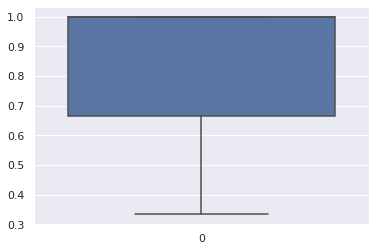

In [ ]:
import seaborn as sns

idx = np.array(knnacc).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor Exactitud (Accuracy) promedio obtenida en la busqueda: ", knnacc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=acca)

####***A.3. Mejores hiperparametros según metrica de Precisión (precision)***

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Positivo (clase positiva)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda:  0.8133333333333335

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  15
Pesos (weights):  uniform
Algoritmo (algorithm):  brute

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


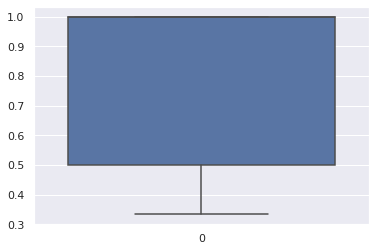

In [ ]:
idx = np.array(knnprep).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda: ", knnprep[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=prepa)

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Negativo (clase negativa)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda:  0.7933333333333333

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  15
Pesos (weights):  uniform
Algoritmo (algorithm):  brute

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


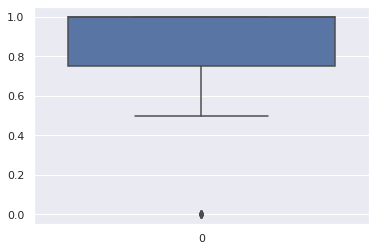

In [ ]:
idx = np.array(knnpren).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda: ", knnpren[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=prena)

####***A.4. Mejores hiperparametros según metrica de Recall***

En el siguiente codigo, se indica el máximo ***Recall para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda:  0.97

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  15
Pesos (weights):  uniform
Algoritmo (algorithm):  kd_tree

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


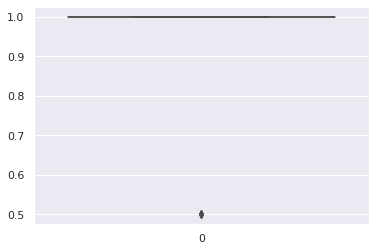

In [ ]:
idx = np.array(knnrecp).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda: ", knnrecp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=recpa)

En el siguiente codigo, se indica el máximo ***Recall para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda:  0.72

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  19
Pesos (weights):  uniform
Algoritmo (algorithm):  brute

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


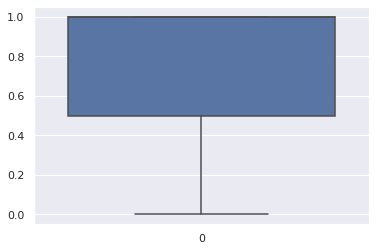

In [ ]:
idx = np.array(knnrecn).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda: ", knnrecn[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=recna)

####***A.5. Mejores hiperparametros según metrica de F1***

En el siguiente codigo, se indica el máximo ***F1 para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.8519999999999999

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  14
Pesos (weights):  uniform
Algoritmo (algorithm):  ball_tree

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


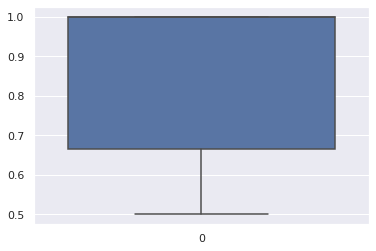

In [ ]:
idx = np.array(knnf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda: ", knnf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

En el siguiente codigo, se indica el máximo ***F1 para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Negativo (clase negativa) promedio obtenido en la busqueda:  0.7293333333333334

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  14
Pesos (weights):  uniform
Algoritmo (algorithm):  brute

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


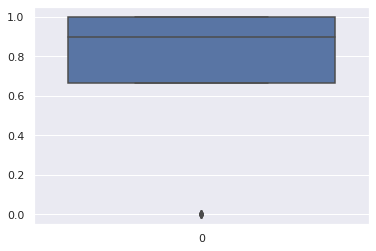

In [ ]:
idx = np.array(knnf1n).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor F1 para Negativo (clase negativa) promedio obtenido en la busqueda: ", knnf1n[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=f1na)

####***A.6. Mejores hiperparametros según metrica de Área bajo la curva ROC (AUC)***

En el siguiente codigo, se indica la máxima ***Área bajo la curva ROC (AUC)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***AUCs*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.  

Mejor AUC promedio obtenido en la busqueda:  0.8725

Mejores Hiperparametros obtenidos en la busqueda:
Numero de vecinos (n_neighbors):  28
Pesos (weights):  uniform
Algoritmo (algorithm):  brute

Boxplot de AUCs obtenidos en el cross-validation:


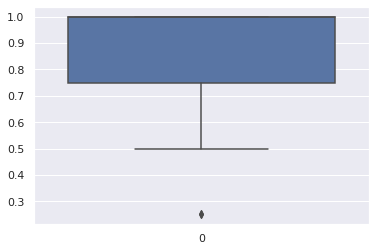

In [ ]:
idx = np.array(knnauc).argsort()[-1] #Indice del mejor modelo
bestmodel = knnmods[idx]
print("Mejor AUC promedio obtenido en la busqueda: ", knnauc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de vecinos (n_neighbors): ", bestmodel.get_params()['n_neighbors'])
print("Pesos (weights): ", bestmodel.get_params()['weights'])
print("Algoritmo (algorithm): ", bestmodel.get_params()['algorithm'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=auca)

####***A.7. Comparación y Síntesis***

En esta parte, se procedera a realizar la síntesis o resumen de los resultados obtenidos. Se empleara una comparación entre los mismos, con el objetivo de formular conclusiones apropiadas. La evaluación se desarrolla en base a distintas metricas. Entre ellas, cabe mencionar ***Exactitud, Precisión, Recall, F1 y Área bajo la curva ROC (AUC)***. Asimismo, tambien se usa el ***Promedio de métricas***, el cual constituye el promedio de los valores de todas las metricas mencionadas. Dicho promedio fue planteado con el objetivo de considerar la maximización de todas las metricas en la busqueda de los mejores hiperparametros. En la siguiente tabla, se presentan los ***hiperparametros*** que maximizan los valores de cada metrica. En ese sentido, ello permite identificar los mejores ***hiperparametros*** en base a que medida se desee optimizar. 

![alt text](https://i.ibb.co/xf4krzh/knntab.png)

De acuerdo a lo observado en la tabla anterior, es posible concluir que el mejor valor para el ***hiperparametro Pesos*** es ***Uniform***, ya que este logro ser el mejor para todas las métricas consideradas. Asimismo, respecto a ***Numero de vecinos***, no hay un valor mayoritario como en el caso anterior. No obstante, en este tipo de casos, es importante elegir un metrica para basarse en ella y analizar lo obtenido respecto a ***boxplots*** y otros elementos estadisticos. En este caso, se selecciona ***F1*** como metrica de mayor relevancia. El ***Boxplot*** de ***F1*** para ***Positivo***, es decir para la clase positiva, posee sus valores distribuidos en valores altos, siendo su limite inferior ***0.5***. Igualmente, el ***Boxplot*** de ***F1*** para ***Negativo***, es decir para la clase negativa, tambien posee sus valores distribuidos en valores altos. El valor promedio de ***F1*** para ***Negativo*** no es tan alto, ya que presenta ***outliers*** en ***0.0***. Considerando la información dada anteriormente, se concluye que ***F1***, en este caso, es un metrica de decisión apropiada. ***14*** logro ser el mejor valor para el ***hiperparametro Numero de vecinos***, en el caso de ***F1*** para ***Positivo*** y ***F1*** para ***Negativo***. Por ultimo, para el ***hiperparametro Algoritmo***, se logra determinar ***Brute*** como el valor optimo, ya que este funciona mejor para la mayoria de metricas consideradas. Por lo tanto, se concluye que los ***hiperparametros*** que logran maximizar las metricas de forma conjunta y funcionan mejor con los datos son:

* ***Numero de vecinos (n_neighbors): 14***
* ***Pesos (weights): Uniform***
* ***Algoritmo (algorithm): Brute***




###***B. Árbol de Decisión***

Se procedera a realizar el ajuste de hiperparametros para ***Arbol de Decisión*** con el conjunto de datos dado. Con respecto a dicho ajuste, nos enfocaremos en ***4 hiperparametros*** principalmente, los cuales son ***Maxima profundidad (max_depth), min_samples_split, min_samples_leaf y max_features***. Estos seran ajustados, ya que son considerados los más importantes. Se tratara de buscar la combinación de estos ***hiperparametros*** que maximize la performance de clasficación. Se aplicara ***cross-validation estratificado con K=50*** para el muestreo. La evaluación de cada combinación de ***hiperparametros*** se realizá con la función ***test_model***. Llegados a este punto, se procedera a describir a los ***hiperparametros***:

* ***Maxima profundidad (max_depth): La profundidad máxima del árbol.***

* ***min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno.***

* ***min_samples_leaf: El número mínimo de muestras necesarias para estar en un nodo hoja.***

* ***max_features: La cantidad de características a considerar cuando se busca la mejor división. Entre las posibilidades, se cuenta con Raíz (sqrt), Logaritmo (log2) y Ninguno de los anteriores (None).***

En el siguiente codigo, respecto a la busqueda de los mejores hiperparametros, no se estan evaluando todas las posibilidades. En este caso, lo que se propone es primero realizar una búsqueda general rápida, con el objetivo de ubicar, aproximadamente, el rango en el que se podría encontrar el ***hiperparametro*** óptimo. Una vez ubicado dicho rango, proceder con una búsqueda exhaustiva. Además, se almacena el ***promedio de las metricas*** obtenidas, por cada combinación de ***hiperparametros*** evaluada, en un arreglo. Con dicho promedio, se logra considerar la optimización de todas las metricas en la busqueda de los ***hiperparametros***. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Hiperparametros:
maxdepts = [5, 10, 30, 50, 100,200]
mssplits = [2, 0.1, 0.3, 0.6, 0.8]
msleafs = [0.1, 0.3, 0.5]
mfeats = ['sqrt','log2',None]

dtcallp = [] #Arreglo para guardar el promedio de todas las metricas
dtcmods = [] #Arreglo para guardar los modelos ajustados

for d in maxdepts: #Busqueda de hiperparametros
  for s in mssplits:
    for l in msleafs:
      for f in mfeats: 
        dtc = DecisionTreeClassifier(max_depth=d, min_samples_split=s, min_samples_leaf=l, max_features=f)
        acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(dtc, df, 50)
        dtcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
        dtcmods.append(dtc)

Con la evaluación ***test_model***, se consideran una serie de metricas, las cuales son promediadas y almacenadas durante la busqueda. En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio. 

In [ ]:
idx = np.array(dtcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", dtcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])

Mejor promedio de metricas obtenido en la busqueda:  0.8002083333333332

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  30
min_samples_split:  0.6
min_samples_leaf:  0.1
max_features:  sqrt


De acuerdo a lo obtenido anteriormente, con respecto a la ***Maxima profundidad (max_depth)***, se logra identificar que el mejor valor para dicho ***hiperparametro*** es cercano a ***30***. En ese sentido, se reducira el rango a **[20, 40]**. Ahora bien, con respecto a ***min_samples_split***, el mejor valor se aproxima a ***0.6***. Por lo tanto, el rango, en este caso, sera reducido a **[0.5, 0.7]**. Igualmente, el mejor valor para ***min_samples_leaf*** es cercano a ***0.1***, por lo que el rango respectivo sera reducido a **[0, 0.2]**. Teniendo en cuento estos rangos, se procedera a realizar una busqueda exhaustiva. Cabe mencionar que se almacenan las metricas obtenidas y el promedio de dichas metricas, por cada combinación de ***hiperparametros*** evaluada, en arreglos.

In [ ]:
#Hiperparametros:
maxdepts = [i for i in range(20,40)]
mssplits = [i*0.01 for i in range(50, 70, 2)]
msleafs = [i*0.01 for i in range(1, 20, 2)]
mfeats = ['sqrt','log2',None]

dtcacc = [] #Arreglo para guardar exactitudes
dtcprep = [] #Arreglo para guardar precisiones positivas
dtcrecp = [] #Arreglo para guardar recalls positivos
dtcf1p = [] #Arreglo para guardar F1s positivos
dtcpren = [] #Arreglo para guardar precisiones negativas
dtcrecn = [] #Arreglo para guardar recalls negativos
dtcf1n = [] #Arreglo para guardar F1s negativos
dtcauc = [] #Arreglo para guardar AUCs
dtcallp = [] #Arreglo para guardar el promedio de todas las metricas
dtcmods = [] #Arreglo para guardar los modelos ajustados

for d in maxdepts: #Busqueda de hiperparametros
  for s in mssplits:
    for l in msleafs:
      for f in mfeats: 
        dtc = DecisionTreeClassifier(max_depth=d, min_samples_split=s, min_samples_leaf=l, max_features=f)
        acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(dtc, df, 50)
        dtcacc.append(acc)
        dtcprep.append(prep)
        dtcrecp.append(recp)
        dtcf1p.append(f1p)
        dtcpren.append(pren)
        dtcrecn.append(recn)
        dtcf1n.append(f1n)
        dtcauc.append(auc)
        dtcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
        dtcmods.append(dtc)

####***B.1. Mejores hiperparametros según Promedio de métricas***

En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio.

In [ ]:
idx = np.array(dtcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", dtcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])

Mejor promedio de metricas obtenido en la busqueda:  0.8311249999999999

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  32
min_samples_split:  0.66
min_samples_leaf:  0.15
max_features:  sqrt


Ahora bien, considerando el promedio de todas las metricas evaluadas, se logra definir los ***hiperparametros*** señalados anteriormente como los mejores. No obstante, ello puede cambiar si se analiza desde la perspectiva de cada metrica. Por lo tanto, se procedera a indicar el maximo valor obtenido de cada metrica, durante la busqueda, y los ***hiperparametros*** que permiten alcanzar dicho valor. 

####***B.2. Mejores hiperparametros según metrica de Exactitud (Accuracy)***

En el siguiente codigo, se indica la máxima ***Exactitud (Accuracy)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***exactitudes*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.

Mejor Exactitud (Accuracy) promedio obtenida en la busqueda:  0.8299999999999998

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  32
min_samples_split:  0.66
min_samples_leaf:  0.15
max_features:  sqrt

Boxplot de exactitudes obtenidas en el cross-validation:


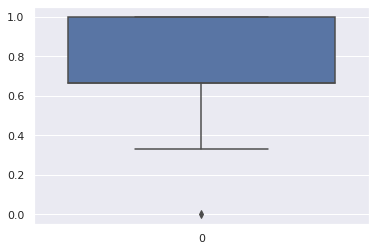

In [ ]:
idx = np.array(dtcacc).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Exactitud (Accuracy) promedio obtenida en la busqueda: ", dtcacc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=acca)

####***B.3. Mejores hiperparametros según metrica de Precisión (precision)***

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Positivo (clase positiva)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda:  0.8366666666666667

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  32
min_samples_split:  0.66
min_samples_leaf:  0.15
max_features:  sqrt

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


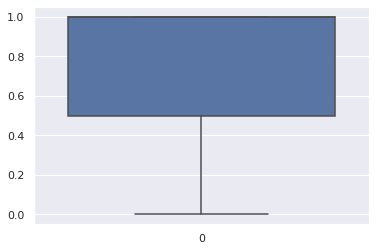

In [ ]:
idx = np.array(dtcprep).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda: ", dtcprep[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=prepa)

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Negativo (clase negativa)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda:  0.8333333333333333

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  32
min_samples_split:  0.66
min_samples_leaf:  0.15
max_features:  sqrt

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


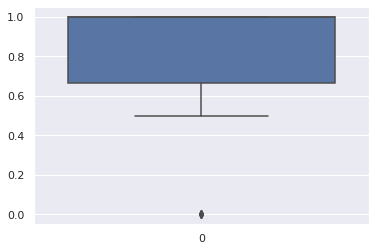

In [ ]:
idx = np.array(dtcpren).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda: ", dtcpren[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=prena)

####***B.4. Mejores hiperparametros según metrica de Recall***

En el siguiente codigo, se indica el máximo ***Recall para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda:  0.96

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  32
min_samples_split:  0.6
min_samples_leaf:  0.01
max_features:  sqrt

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


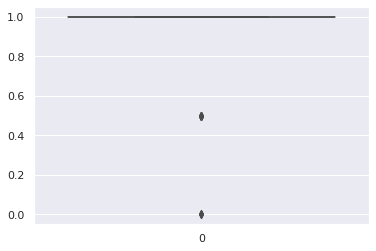

In [ ]:
idx = np.array(dtcrecp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda: ", dtcrecp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=recpa)

En el siguiente codigo, se indica el máximo ***Recall para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda:  0.83

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  31
min_samples_split:  0.68
min_samples_leaf:  0.15
max_features:  sqrt

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


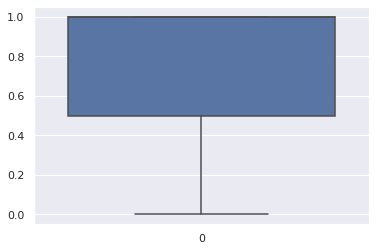

In [ ]:
idx = np.array(dtcrecn).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda: ", dtcrecn[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=recna)

####***B.5. Mejores hiperparametros según metrica de F1***

En el siguiente codigo, se indica el máximo ***F1 para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.8426666666666667

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  32
min_samples_split:  0.6
min_samples_leaf:  0.01
max_features:  sqrt

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


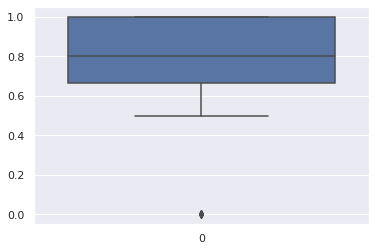

In [ ]:
idx = np.array(dtcf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda: ", dtcf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

En el siguiente codigo, se indica el máximo ***F1 para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Negativo (clase negativa) promedio obtenido en la busqueda:  0.7959999999999998

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  36
min_samples_split:  0.6
min_samples_leaf:  0.13
max_features:  sqrt

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


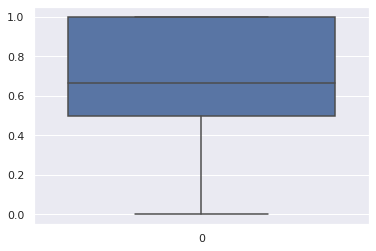

In [ ]:
idx = np.array(dtcf1n).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor F1 para Negativo (clase negativa) promedio obtenido en la busqueda: ", dtcf1n[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=f1na)

####***B.6. Mejores hiperparametros según metrica de Área bajo la curva ROC (AUC)***

En el siguiente codigo, se indica la máxima ***Área bajo la curva ROC (AUC)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***AUCs*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.  

Mejor AUC promedio obtenido en la busqueda:  0.855

Mejores Hiperparametros obtenidos en la busqueda:
Maxima profundidad (max_depth):  22
min_samples_split:  0.5
min_samples_leaf:  0.05
max_features:  log2

Boxplot de AUCs obtenidos en el cross-validation:


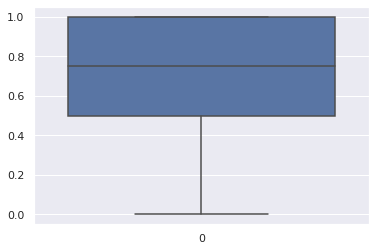

In [ ]:
idx = np.array(dtcauc).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor AUC promedio obtenido en la busqueda: ", dtcauc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Maxima profundidad (max_depth): ", bestmodel.get_params()['max_depth'])
print("min_samples_split: ", bestmodel.get_params()['min_samples_split'])
print("min_samples_leaf: ", bestmodel.get_params()['min_samples_leaf'])
print("max_features: ", bestmodel.get_params()['max_features'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=auca)

####***B.7. Comparación y Síntesis***

En esta parte, se procedera a realizar la síntesis o resumen de los resultados obtenidos. Se empleara una comparación entre los mismos, con el objetivo de formular conclusiones apropiadas. La evaluación se desarrolla en base a distintas metricas. Entre ellas, cabe mencionar ***Exactitud, Precisión, Recall, F1 y Área bajo la curva ROC (AUC)***. Asimismo, tambien se usa el ***Promedio de métricas***, el cual constituye el promedio de los valores de todas las metricas mencionadas. Dicho promedio fue planteado con el objetivo de considerar la maximización de todas las metricas en la busqueda de los mejores hiperparametros. En la siguiente tabla, se presentan los ***hiperparametros*** que maximizan los valores de cada metrica. En ese sentido, ello permite identificar los mejores ***hiperparametros*** en base a que medida se desee optimizar. 

![alt text](https://i.ibb.co/m451XKs/dtctab.png)

De acuerdo a lo observado en la tabla anterior, es posible concluir que el mejor valor para el ***hiperparametro Maxima profundidad*** es ***32***, ya que este logro ser el mejor para la mayoria de metricas consideradas. Asimismo, respecto a ***min samples split***, no hay un valor mayoritario como en el caso anterior. No obstante, en este tipo de casos, es importante elegir un metrica para basarse en ella y analizar lo obtenido respecto a ***boxplots*** y otros elementos estadisticos. En este caso, se selecciona ***F1*** como metrica de mayor relevancia. El ***Boxplot*** de ***F1*** para ***Positivo***, es decir para la clase positiva, posee sus valores distribuidos en valores altos, con una mediana de ***0.8*** y presencia de ***outliers*** en ***0.0***. Igualmente, el ***Boxplot*** de ***F1*** para ***Negativo***, es decir para la clase negativa, tambien posee sus valores distribuidos en valores relativamente altos, si bien presenta su limite inferior en ***0.0***. Considerando la información dada anteriormente, se concluye que ***F1***, en este caso, es un metrica de decisión apropiada. ***0.6*** logro ser el mejor valor para el ***hiperparametro min samples split***, en el caso de ***F1*** para ***Positivo*** y ***F1*** para ***Negativo***. Asimismo, para los ***hiperparametros min samples leaf*** y ***max features***, se logra determinar ***0.15*** y ***Raíz*** como los mejores valores respectivamente, ya que estos funcionan mejor para la mayoria de metricas consideradas. Por lo tanto, se concluye que los ***hiperparametros*** que logran maximizar las metricas de forma conjunta y funcionan mejor con los datos son:

* ***Maxima profundidad (max_depth): 32***
* ***min_samples_split: 0.6***
* ***min_samples_leaf: 0.15***
* ***max_features: Raíz (sqrt)***

###***C. Random Forest***

Se procedera a realizar el ajuste de hiperparametros para ***Random Forest*** con el conjunto de datos dado. Con respecto a dicho ajuste, nos enfocaremos en ***4 hiperparametros*** principalmente, los cuales son ***Numero de estimadores (n_estimators), Profundidad maxima (max_depth), max_features y bootstrap***. Estos seran ajustados, ya que son considerados los más importantes. Se tratara de buscar la combinación de estos ***hiperparametros*** que maximize la performance de clasficación. Se aplicara ***cross-validation estratificado con K=10*** para el muestreo. La evaluación de cada combinación de ***hiperparametros*** se realizá con la función ***test_model***. Llegados a este punto, se procedera a describir a los ***hiperparametros***:

* ***Numero de estimadores (n_estimators): El número de árboles en el bosque.***

* ***Profundidad maxima (max_depth): Número máximo de niveles en cada árbol de decisión.***

* ***max_features: Número máximo de características consideradas para dividir un nodo. Entre los posibles valores a considerar, tenemos Automatico (auto), Raíz (sqrt) y Logaritmo (log2).***

* ***bootstrap: Si las muestras de bootstrap se usan al construir árboles. Este hiperparametro puede tomar el valor de Verdadero (True) o Falso (False). Si es falso, todo el conjunto de datos se usa para construir cada árbol.***

En el siguiente codigo, respecto a la busqueda de los mejores hiperparametros, no se estan evaluando todas las posibilidades. En este caso, lo que se propone es primero realizar una búsqueda general rápida, con el objetivo de ubicar, aproximadamente, el rango en el que se podría encontrar el ***hiperparametro*** óptimo. Una vez ubicado dicho rango, proceder con una búsqueda exhaustiva. Además, se almacena el ***promedio de las metricas*** obtenidas, por cada combinación de ***hiperparametros*** evaluada, en un arreglo. Con dicho promedio, se logra considerar la optimización de todas las metricas en la busqueda de los ***hiperparametros***.

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

#Hiperparametros:
nestims = [10, 50, 100, 200]
mdepts = [5, 10, 30, 50, 100]
mfeats = ['auto', 'sqrt', 'log2']
boots = [True, False]

rfcallp = [] #Arreglo para guardar el promedio de todas las metricas
rfcmods = [] #Arreglo para guardar los modelos ajustados

for ne in nestims: #Busqueda de hiperparametros
  for md in mdepts:
    for mf in mfeats:
      for b in boots:
        rfc = RFC(n_estimators=ne, max_depth=md, max_features=mf, bootstrap=b)
        acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(rfc, df, 50)
        rfcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
        rfcmods.append(rfc)

Con la evaluación ***test_model***, se consideran una serie de metricas, las cuales son promediadas y almacenadas durante la busqueda. En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio. 

In [ ]:
idx = np.array(rfcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", rfcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])

Mejor promedio de metricas obtenido en la busqueda:  0.7953541666666667

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  10
Profundidad maxima (max_depth):  5
max_features:  auto
bootstrap:  True


De acuerdo a lo obtenido anteriormente, con respecto al ***Numero de estimadores (n_estimators)***, se logra identificar que el mejor valor para dicho ***hiperparametro*** es cercano a ***10***. En ese sentido, se reducirá el rango a **[5, 15]**. Asimismo, el valor optimo para ***Profundidad maxima (max_depth)*** se aproxima a ***5***, por lo que se reducirá el rango a **[2,11]**. Continuando con el asunto, se procedera a realizar una busqueda exhaustiva. Cabe mencionar que se almacenan las metricas obtenidas y el promedio de dichas metricas, por cada combinación de ***hiperparametros*** evaluada, en arreglos.

In [ ]:
#Hiperparametros:
nestims = [i for i in range(5, 15)]
mdepts = [i for i in range(2, 11)]
mfeats = ['auto', 'sqrt', 'log2']
boots = [True, False]

rfcacc = [] #Arreglo para guardar exactitudes
rfcprep = [] #Arreglo para guardar precisiones positivas
rfcrecp = [] #Arreglo para guardar recalls positivos
rfcf1p = [] #Arreglo para guardar F1s positivos
rfcpren = [] #Arreglo para guardar precisiones negativas
rfcrecn = [] #Arreglo para guardar recalls negativos
rfcf1n = [] #Arreglo para guardar F1s negativos
rfcauc = [] #Arreglo para guardar AUCs
rfcallp = [] #Arreglo para guardar el promedio de todas las metricas
rfcmods = [] #Arreglo para guardar los modelos ajustados

for ne in nestims: #Busqueda de hiperparametros
  for md in mdepts:
    for mf in mfeats:
      for b in boots:
        rfc = RFC(n_estimators=ne, max_depth=md, max_features=mf, bootstrap=b)
        acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(rfc, df, 50)
        rfcacc.append(acc)
        rfcprep.append(prep)
        rfcrecp.append(recp)
        rfcf1p.append(f1p)
        rfcpren.append(pren)
        rfcrecn.append(recn)
        rfcf1n.append(f1n)
        rfcauc.append(auc)
        rfcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
        rfcmods.append(rfc)

####***C.1. Mejores hiperparametros según Promedio de métricas***

En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio. 

In [ ]:
idx = np.array(rfcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", rfcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])

Mejor promedio de metricas obtenido en la busqueda:  0.8035625

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  6
Profundidad maxima (max_depth):  2
max_features:  log2
bootstrap:  True


Ahora bien, considerando el promedio de todas las metricas evaluadas, se logra definir los ***hiperparametros*** señalados anteriormente como los mejores. No obstante, ello puede cambiar si se analiza desde la perspectiva de cada metrica. Por lo tanto, se procedera a indicar el maximo valor obtenido de cada metrica, durante la busqueda, y los ***hiperparametros*** que permiten alcanzar dicho valor. 

####***C.2. Mejores hiperparametros según metrica de Exactitud (Accuracy)***

En el siguiente codigo, se indica la máxima ***Exactitud (Accuracy)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***exactitudes*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.

Mejor Exactitud (Accuracy) promedio obtenida en la busqueda:  0.815

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  12
Profundidad maxima (max_depth):  9
max_features:  sqrt
bootstrap:  True

Boxplot de exactitudes obtenidas en el cross-validation:


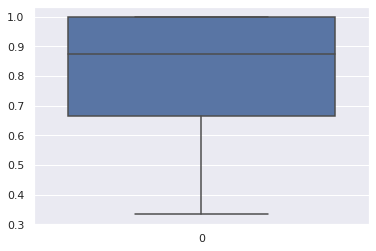

In [ ]:
idx = np.array(rfcacc).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor Exactitud (Accuracy) promedio obtenida en la busqueda: ", rfcacc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=acca)

####***C.3. Mejores hiperparametros según metrica de Precisión (precision)***

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Positivo (clase positiva)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda:  0.8066666666666668

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  10
Profundidad maxima (max_depth):  2
max_features:  sqrt
bootstrap:  True

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


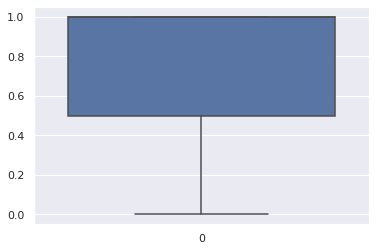

In [ ]:
idx = np.array(rfcprep).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda: ", rfcprep[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=prepa)

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Negativo (clase negativa)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda:  0.7833333333333333

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  6
Profundidad maxima (max_depth):  2
max_features:  log2
bootstrap:  True

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


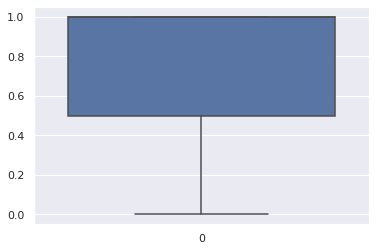

In [ ]:
idx = np.array(rfcpren).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda: ", rfcpren[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=prena)

####***C.4. Mejores hiperparametros según metrica de Recall***

En el siguiente codigo, se indica el máximo ***Recall para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda:  0.97

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  11
Profundidad maxima (max_depth):  8
max_features:  auto
bootstrap:  True

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


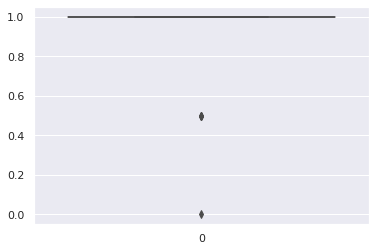

In [ ]:
idx = np.array(rfcrecp).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda: ", rfcrecp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=recpa)

En el siguiente codigo, se indica el máximo ***Recall para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda:  0.72

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  5
Profundidad maxima (max_depth):  2
max_features:  auto
bootstrap:  False

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


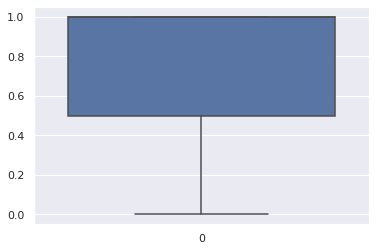

In [ ]:
idx = np.array(rfcrecn).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda: ", rfcrecn[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=recna)

####***C.5. Mejores hiperparametros según metrica de F1***

En el siguiente codigo, se indica el máximo ***F1 para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.8519999999999999

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  5
Profundidad maxima (max_depth):  6
max_features:  log2
bootstrap:  True

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


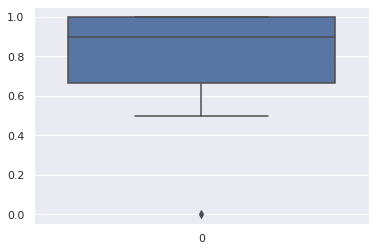

In [ ]:
idx = np.array(rfcf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda: ", rfcf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

En el siguiente codigo, se indica el máximo ***F1 para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Negativo (clase negativa) promedio obtenido en la busqueda:  0.7260000000000001

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  6
Profundidad maxima (max_depth):  2
max_features:  log2
bootstrap:  True

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


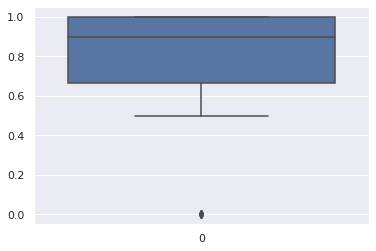

In [ ]:
idx = np.array(rfcf1n).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor F1 para Negativo (clase negativa) promedio obtenido en la busqueda: ", rfcf1n[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=f1na)

####***C.6. Mejores hiperparametros según metrica de Área bajo la curva ROC (AUC)***

En el siguiente codigo, se indica la máxima ***Área bajo la curva ROC (AUC)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***AUCs*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.  

Mejor AUC promedio obtenido en la busqueda:  0.8825

Mejores Hiperparametros obtenidos en la busqueda:
Numero de estimadores (n_estimators):  10
Profundidad maxima (max_depth):  8
max_features:  auto
bootstrap:  True

Boxplot de AUCs obtenidos en el cross-validation:


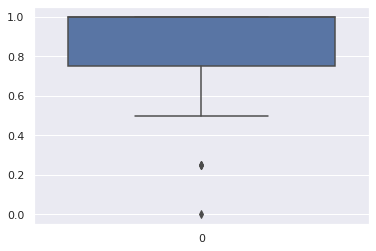

In [ ]:
idx = np.array(rfcauc).argsort()[-1] #Indice del mejor modelo
bestmodel = rfcmods[idx]
print("Mejor AUC promedio obtenido en la busqueda: ", rfcauc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("Numero de estimadores (n_estimators): ", bestmodel.get_params()['n_estimators'])
print("Profundidad maxima (max_depth): ", bestmodel.get_params()['max_depth'])
print("max_features: ", bestmodel.get_params()['max_features'])
print("bootstrap: ", bestmodel.get_params()['bootstrap'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=auca)

####***C.7. Comparación y Analisis***

En esta parte, se procedera a realizar la síntesis o resumen de los resultados obtenidos. Se empleara una comparación entre los mismos, con el objetivo de formular conclusiones apropiadas. La evaluación se desarrolla en base a distintas metricas. Entre ellas, cabe mencionar ***Exactitud, Precisión, Recall, F1 y Área bajo la curva ROC (AUC)***. Asimismo, tambien se usa el ***Promedio de métricas***, el cual constituye el promedio de los valores de todas las metricas mencionadas. Dicho promedio fue planteado con el objetivo de considerar la maximización de todas las metricas en la busqueda de los mejores hiperparametros. En la siguiente tabla, se presentan los ***hiperparametros*** que maximizan los valores de cada metrica. En ese sentido, ello permite identificar los mejores ***hiperparametros*** en base a que medida se desee optimizar. 

![alt text](https://i.ibb.co/vPtDN45/rftab.png)

De acuerdo a lo observado en la tabla anterior, es posible concluir que el mejor valor para el ***hiperparametro bootstrap*** es ***True***, ya que este logro ser el mejor para la mayoria de metricas consideradas. Asimismo, respecto al ***Numero de estimadores*** y ***max features***, no hay un valor mayoritario como en el caso anterior. No obstante, en este tipo de casos, es importante elegir un metrica para basarse en ella y analizar lo obtenido respecto a ***boxplots*** y otros elementos estadisticos. En este caso, se selecciona ***F1*** como metrica de mayor relevancia. Tanto el ***Boxplot*** de ***F1*** para ***Positivo*** como el ***Boxplot*** de ***F1*** para ***Negativo***, es decir para la clase positiva y negativa respectivamente, poseen sus valores distribuidos en valores altos, con su limite inferior en ***0.5*** aproximadamente y presencia de ***outliers*** en ***0.0***. Considerando la información dada anteriormente, se concluye que ***F1***, en este caso, es una metrica de decisión apropiada. ***Logaritmo*** logro ser el mejor valor para el ***hiperparametro max features***, en el caso de ***F1*** para ***Positivo*** y ***F1*** para ***Negativo***. Ahora bien, ***F1*** para ***Positivo*** sera más prioritaria que ***F1*** para ***Negativo***, ya que se desea enfocar la optimización de desempeño en la clasificación de reseñas ***positivas***. En consecuencia, el mejor valor para ***Numero de estimadores*** es ***5***, ya que funciona mejor con ***F1*** para ***Positivo***. Además, para el ***hiperparametro Profundidad maxima***, se logra determinar ***2*** como el mejor valor, ya que este funciona mejor para la mayoria de metricas consideradas. Por lo tanto, se concluye que los ***hiperparametros*** que logran maximizar las metricas de forma conjunta y funcionan mejor con los datos son:

* ***Numero de estimadores (n_estimators):  5***
* ***Profundidad maxima (max_depth):  2***
* ***max_features:  Logaritmo (log2)***
* ***bootstrap:  True***

### ***D. Regresión Logistica (Logistic Regression)***

Se procedera a realizar el ajuste de hiperparametros para ***Regresión Logistica (Logistic Regression)*** con el conjunto de datos dado. Con respecto a dicho ajuste, nos enfocaremos en ***3 hiperparametros*** principalmente, los cuales son ***C (parametro de regularización), class_weight y Solucionador (solver)***. Estos seran ajustados, ya que son considerados los más importantes. Se tratara de buscar la combinación de estos ***hiperparametros*** que maximize la performance de clasficación. Se aplicara ***cross-validation estratificado con K=50*** para el muestreo. La evaluación de cada combinación de ***hiperparametros*** se realizá con la función ***test_model***. Llegados a este punto, se procedera a describir a los ***hiperparametros***:

* ***C: Parametro de regularización inverso de la fuerza de regularización; debe ser un valor positivo. Al igual que en las máquinas de vectores de soporte (SVM), los valores más pequeños especifican una regularización más fuerte.***

* ***class_weight: Pesos asociados con clases. Si no se especifica, se supone que todas las clases tienen un peso uno. Entre los posibles valores que se pueden tomar, tenemos Ninguno (none) o Balanceado (balanced).***

* ***Solucionador (solver): Indica el algoritmo a utilizar en el problema de optimización. El algoritmo puede ser newton-cg, lbfgs, liblinear, sag o saga.***



En el siguiente codigo, respecto a la busqueda de los mejores hiperparametros, no se estan evaluando todas las posibilidades. En este caso, lo que se propone es primero realizar una búsqueda general rápida, con el objetivo de ubicar, aproximadamente, el rango en el que se podría encontrar el ***hiperparametro*** óptimo. Una vez ubicado dicho rango, proceder con una búsqueda exhaustiva. Además, se almacena el ***promedio de las metricas*** obtenidas, por cada combinación de ***hiperparametros*** evaluada, en un arreglo. Con dicho promedio, se logra considerar la optimización de todas las metricas en la busqueda de los ***hiperparametros***.

In [ ]:
bestlr = LR(C=245, class_weight='balanced', solver='liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

#Hiperparametros:
C = [100, 200, 250, 300, 400]
class_weight = ['balanced', None]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

dtcallp = [] #Arreglo para guardar el promedio de todas las metricas
dtcmods = [] #Arreglo para guardar los modelos ajustados

for c in C: #Busqueda de hiperparametros
  for w in class_weight:
    for s in solver:
      bestlr = LR(C=c, class_weight=w, solver=s)
      acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(bestlr, df, 50)
      dtcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
      dtcmods.append(bestlr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Con la evaluación ***test_model***, se consideran una serie de metricas, las cuales son promediadas y almacenadas durante la busqueda. En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio. 

In [ ]:
idx = np.array(dtcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", dtcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight - Balanceado (balanced): ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])

Mejor promedio de metricas obtenido en la busqueda:  0.7885625

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  100
class_weight - Balanceado (balanced):  balanced
solver:  newton-cg


De acuerdo a lo obtenido anteriormente, con respecto a ***El parametro de regularización C***, se logra identificar que el mejor valor para dicho ***hiperparametro*** es cercano a ***100***. En ese sentido, se reducirá el rango a **[200, 300]** para estar seguro de obtener los mejores resultados. Para los hiperparametros ***class_weight*** y ***solver*** se usaran los arreglos con los mismos valores que en la prueba anterior. Continuando con el asunto, se procedera a realizar una busqueda exhaustiva. Cabe mencionar que se almacenan las metricas obtenidas y el promedio de dichas metricas, por cada combinación de ***hiperparametros*** evaluada, en arreglos.

In [ ]:
#Hiperparametros:
C = [i for i in range(200,300)]
class_weight = ['balanced', None]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

dtcacc = [] #Arreglo para guardar exactitudes
dtcprep = [] #Arreglo para guardar precisiones positivas
dtcrecp = [] #Arreglo para guardar recalls positivos
dtcf1p = [] #Arreglo para guardar F1s positivos
dtcpren = [] #Arreglo para guardar precisiones negativas
dtcrecn = [] #Arreglo para guardar recalls negativos
dtcf1n = [] #Arreglo para guardar F1s negativos
dtcauc = [] #Arreglo para guardar AUCs
dtcallp = [] #Arreglo para guardar el promedio de todas las metricas
dtcmods = [] #Arreglo para guardar los modelos ajustados

for c in C: #Busqueda de hiperparametros
  for w in class_weight:
    for s in solver:
      bestlr = LR(C=c, class_weight=w, solver=s)
      acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(bestlr, df, 50)
      dtcacc.append(acc)
      dtcprep.append(prep)
      dtcrecp.append(recp)
      dtcf1p.append(f1p)
      dtcpren.append(pren)
      dtcrecn.append(recn)
      dtcf1n.append(f1n)
      dtcauc.append(auc)
      dtcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
      dtcmods.append(bestlr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

####***D.1. Mejores hiperparametros según Promedio de métricas***

En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio. 

In [ ]:
import numpy as np

idx = np.array(dtcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", dtcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])

Mejor promedio de metricas obtenido en la busqueda:  0.7885625

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag


Ahora bien, considerando el promedio de todas las metricas evaluadas, se logra definir los ***hiperparametros*** señalados anteriormente como los mejores. No obstante, ello puede cambiar si se analiza desde la perspectiva de cada metrica. Por lo tanto, se procedera a indicar el maximo valor obtenido de cada metrica, durante la busqueda, y los ***hiperparametros*** que permiten alcanzar dicho valor. 

####***D.2. Mejores hiperparametros según metrica de Exactitud (Accuracy)***

En el siguiente codigo, se indica la máxima ***Exactitud (Accuracy)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***exactitudes*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.

Mejor Exactitud (Accuracy) promedio obtenida en la busqueda:  0.7900000000000001

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag

Boxplot de exactitudes obtenidas en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


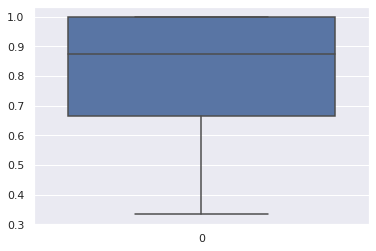

In [ ]:
idx = np.array(dtcacc).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Exactitud (Accuracy) promedio obtenida en la busqueda: ", dtcacc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=acca)

####***D.3. Mejores hiperparametros según metrica de Precisión (precision)***

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Positivo (clase positiva)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda:  0.7900000000000001

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


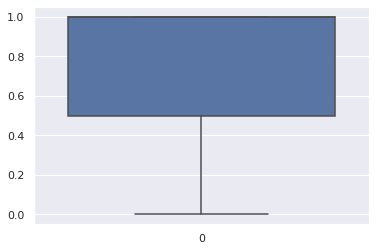

In [ ]:
idx = np.array(dtcprep).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda: ", dtcprep[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=prepa)

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Negativo (clase negativa)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda:  0.7533333333333333

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


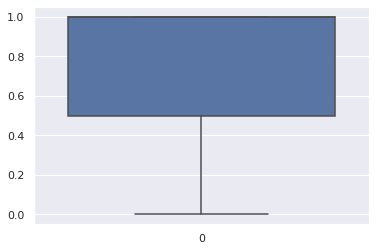

In [ ]:
idx = np.array(dtcpren).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda: ", dtcpren[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=prena)

####***D.4. Mejores hiperparametros según metrica de Recall***

En el siguiente codigo, se indica el máximo ***Recall para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda:  0.9

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  299
class_weight:  None
solver:  saga

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


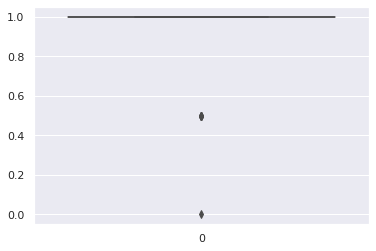

In [ ]:
idx = np.array(dtcrecp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda: ", dtcrecp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=recpa)

En el siguiente codigo, se indica el máximo ***Recall para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda:  0.69

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


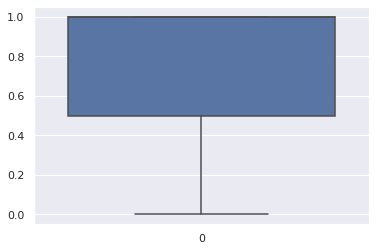

In [ ]:
idx = np.array(dtcrecn).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda: ", dtcrecn[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=recna)

####***D.5. Mejores hiperparametros según metrica de F1***

En el siguiente codigo, se indica el máximo ***F1 para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.8133333333333332

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


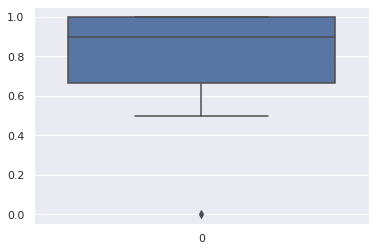

In [ ]:
idx = np.array(dtcf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda: ", dtcf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

En el siguiente codigo, se indica el máximo ***F1 para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.8133333333333332

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  203
class_weight:  balanced
solver:  sag

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


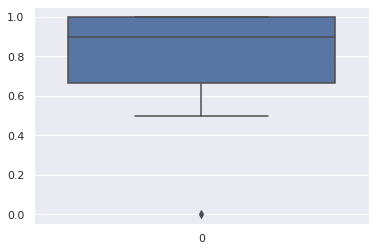

In [ ]:
idx = np.array(dtcf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor F1 para Negativo (clase positiva) promedio obtenido en la busqueda: ", dtcf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

####***D.6. Mejores hiperparametros según metrica de Área bajo la curva ROC (AUC)***

En el siguiente codigo, se indica la máxima ***Área bajo la curva ROC (AUC)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***AUCs*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.  

Mejor AUC promedio obtenido en la busqueda:  0.8725

Mejores Hiperparametros obtenidos en la busqueda:
C (parametro de regularización):  299
class_weight:  None
solver:  saga

Boxplot de AUCs obtenidos en el cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


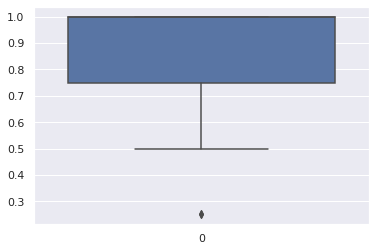

In [ ]:
idx = np.array(dtcauc).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor AUC promedio obtenido en la busqueda: ", dtcauc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("C (parametro de regularización): ", bestmodel.get_params()['C'])
print("class_weight: ", bestmodel.get_params()['class_weight'])
print("solver: ", bestmodel.get_params()['solver'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=auca)

####***D.7. Comparación y Analisis***

En esta parte, se procedera a realizar la síntesis o resumen de los resultados obtenidos. Se empleara una comparación entre los mismos, con el objetivo de formular conclusiones apropiadas. La evaluación se desarrolla en base a distintas metricas. Entre ellas, cabe mencionar ***Exactitud, Precisión, Recall, F1 y Área bajo la curva ROC (AUC)***. Asimismo, tambien se usa el ***Promedio de métricas***, el cual constituye el promedio de los valores de todas las metricas mencionadas. Dicho promedio fue planteado con el objetivo de considerar la maximización de todas las metricas en la busqueda de los mejores hiperparametros. En la siguiente tabla, se presentan los ***hiperparametros*** que maximizan los valores de cada metrica. En ese sentido, ello permite identificar los mejores ***hiperparametros*** en base a que medida se desee optimizar. 

![alt text](https://i.ibb.co/16RpNs3/02.png)

De acuerdo a lo observado en la tabla anterior, es posible concluir que el mejor valor para el ***hiperparametro Pesos*** es ***Uniform***, ya que este logro ser el mejor para todas las métricas consideradas. Asimismo, respecto a ***Numero de vecinos***, no hay un valor mayoritario como en el caso anterior. No obstante, en este tipo de casos, es importante elegir un metrica para basarse en ella y analizar lo obtenido respecto a ***boxplots*** y otros elementos estadisticos. En este caso, se selecciona ***F1*** como metrica de mayor relevancia. El ***Boxplot*** de ***F1*** para ***Positivo***, es decir para la clase positiva, posee sus valores distribuidos en valores altos, siendo su limite inferior ***0.5***. Igualmente, el ***Boxplot*** de ***F1*** para ***Negativo***, es decir para la clase negativa, tambien posee sus valores distribuidos en valores altos. El valor promedio de ***F1*** para ***Negativo*** no es tan alto, ya que presenta ***outliers*** en ***0.0***. Considerando la información dada anteriormente, se concluye que ***F1***, en este caso, es un metrica de decisión apropiada. ***14*** logro ser el mejor valor para el ***hiperparametro Numero de vecinos***, en el caso de ***F1*** para ***Positivo*** y ***F1*** para ***Negativo***. Por ultimo, para el ***hiperparametro Algoritmo***, se logra determinar ***Brute*** como el valor optimo, ya que este funciona mejor para la mayoria de metricas consideradas. Por lo tanto, se concluye que los ***hiperparametros*** que logran maximizar las metricas de forma conjunta y funcionan mejor con los datos son:

* ***C: Parametro de regularización: 203***
* ***class_weight: balanced***
* ***Solucionador (solver): sag***


###***E. Redes Bayesianas Multinomiales (Multinomial Naive Bayes)***

Se procedera a realizar el ajuste de hiperparametros para ***Redes Bayesianas Multinomiales (Multinomial Naive Bayes)*** con el conjunto de datos dado. Con respecto a dicho ajuste, nos enfocaremos en ***2 hiperparametros*** principalmente, los cuales son ***alpha y fit_prior***. Estos seran ajustados, ya que son considerados los más importantes. Se tratara de buscar la combinación de estos ***hiperparametros*** que maximize la performance de clasficación. Se aplicara ***cross-validation estratificado con K=10*** para el muestreo. La evaluación de cada combinación de ***hiperparametros*** se realizá con la función ***test_model***. Llegados a este punto, se procedera a describir a los ***hiperparametros***:

* ***alpha: Parámetro de suavizado aditivo (Laplace / Lidstone) (0 para no suavizado).***

* ***fit_prior: Indica si se aprenden las probabilidades prioritarias de las clases o no. Este hiperparametro puede ser Verdadero (True) o Falso (False). Si es falso, se usará prioridades uniformes.***



En el siguiente codigo, respecto a la busqueda de los mejores hiperparametros, no se estan evaluando todas las posibilidades. En este caso, lo que se propone es primero realizar una búsqueda general rápida, con el objetivo de ubicar, aproximadamente, el rango en el que se podría encontrar el ***hiperparametro*** óptimo. Una vez ubicado dicho rango, proceder con una búsqueda exhaustiva. Además, se almacena el ***promedio de las metricas*** obtenidas, por cada combinación de ***hiperparametros*** evaluada, en un arreglo. Con dicho promedio, se logra considerar la optimización de todas las metricas en la busqueda de los ***hiperparametros***. 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

bestmnb = MultinomialNB(alpha=0, fit_prior=True)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

#Hiperparametros:

#Hiperparametros:
alpha = [0, 0.25, 0.5, 0.75, 1]
fit_prior = [True, False]

dtcallp = [] #Arreglo para guardar el promedio de todas las metricas
dtcmods = [] #Arreglo para guardar los modelos ajustados

for a in alpha: #Busqueda de hiperparametros
  for f in fit_prior:
    bestmnb = MultinomialNB(alpha=a, fit_prior=f)
    acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(bestmnb, df, 50)
    dtcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
    dtcmods.append(bestmnb)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

Con la evaluación ***test_model***, se consideran una serie de metricas, las cuales son promediadas y almacenadas durante la busqueda. En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio.

In [ ]:
idx = np.array(dtcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", dtcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])

Mejor promedio de metricas obtenido en la busqueda:  0.7425208333333333

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True


De acuerdo a lo obtenido anteriormente, con respecto a el ***Parámetro de suavizado aditivo alpha***, se logra identificar que el mejor valor para dicho ***hiperparametro*** es cercano a ***1***. En ese sentido, se reducira el rango a **[0.9, 1]**, y se procedera a realizar una busqueda exhaustiva. Cabe mencionar que se almacenan las metricas obtenidas y el promedio de dichas metricas, por cada combinación de ***hiperparametros*** evaluada, en arreglos.

In [ ]:
#Hiperparametros:
alpha = [0.9, 0.95, 1]
fit_prior = [True, False]

dtcacc = [] #Arreglo para guardar exactitudes
dtcprep = [] #Arreglo para guardar precisiones positivas
dtcrecp = [] #Arreglo para guardar recalls positivos
dtcf1p = [] #Arreglo para guardar F1s positivos
dtcpren = [] #Arreglo para guardar precisiones negativas
dtcrecn = [] #Arreglo para guardar recalls negativos
dtcf1n = [] #Arreglo para guardar F1s negativos
dtcauc = [] #Arreglo para guardar AUCs
dtcallp = [] #Arreglo para guardar el promedio de todas las metricas
dtcmods = [] #Arreglo para guardar los modelos ajustados

for a in alpha: #Busqueda de hiperparametros
  for f in fit_prior:
    bestmnb = MultinomialNB(alpha=a, fit_prior=f)
    acc, prep, recp, f1p, pren, recn, f1n, auc = test_model(bestmnb, df, 50)
    dtcacc.append(acc)
    dtcprep.append(prep)
    dtcrecp.append(recp)
    dtcf1p.append(f1p)
    dtcpren.append(pren)
    dtcrecn.append(recn)
    dtcf1n.append(f1n)
    dtcauc.append(auc)
    dtcallp.append((acc+prep+recp+f1p+pren+recn+f1n+auc)/8)
    dtcmods.append(bestmnb)

####***E.1. Mejores hiperparametros según Promedio de métricas***

En el siguiente codigo, se indica el máximo ***promedio de metricas*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho promedio.

In [ ]:
import numpy as np

idx = np.array(dtcallp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor promedio de metricas obtenido en la busqueda: ", dtcallp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])

Mejor promedio de metricas obtenido en la busqueda:  0.7425208333333333

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True


####***E.2. Mejores hiperparametros según metrica de Exactitud (Accuracy)***

En el siguiente codigo, se indica la máxima ***Exactitud (Accuracy)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***exactitudes*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Exactitud (Accuracy) promedio obtenida en la busqueda:  0.7116666666666669

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True

Boxplot de exactitudes obtenidas en el cross-validation:


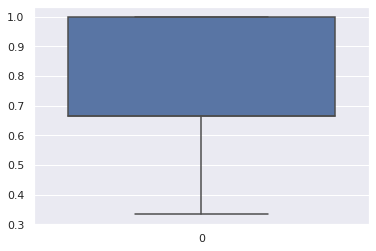

In [ ]:
idx = np.array(dtcacc).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Exactitud (Accuracy) promedio obtenida en la busqueda: ", dtcacc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=acca)

####***E.3. Mejores hiperparametros según metrica de Precisión (precision)***

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Positivo (clase positiva)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda:  0.72

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


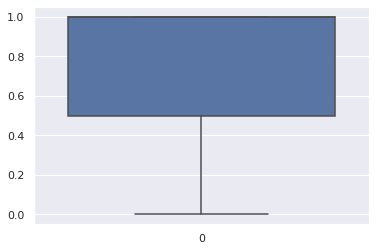

In [ ]:
idx = np.array(dtcprep).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Precisión (precision) para Positivo (clase positiva) promedio obtenida en la busqueda: ", dtcprep[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=prepa)

En el siguiente codigo, se indica la máxima ***Precisión (precision) para Negativo (clase negativa)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***precisiones (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda:  0.7033333333333335

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


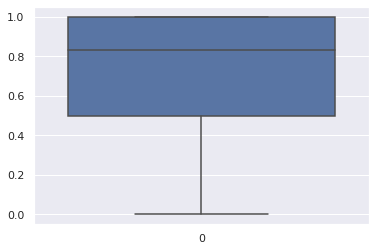

In [ ]:
idx = np.array(dtcpren).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Precisión (precision) para Negativo (clase negativa) promedio obtenida en la busqueda: ", dtcpren[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=prena)

####***E.4. Mejores hiperparametros según metrica de Recall***

En el siguiente codigo, se indica el máximo ***Recall para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda:  0.7

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


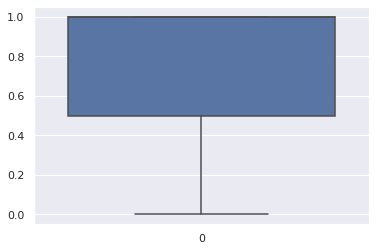

In [ ]:
idx = np.array(dtcrecp).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Recall para Positivo (clase positiva) promedio obtenido en la busqueda: ", dtcrecp[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=recpa)

En el siguiente codigo, se indica el máximo ***Recall para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***recalls (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda:  0.95

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  False

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


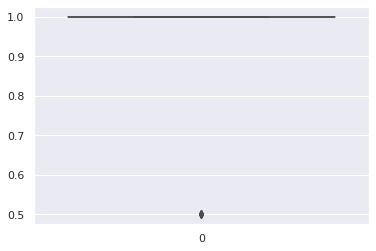

In [ ]:
idx = np.array(dtcrecn).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor Recall para Negativo (clase negativa) promedio obtenido en la busqueda: ", dtcrecn[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=recna)

####***E.5. Mejores hiperparametros según metrica de F1***

En el siguiente codigo, se indica el máximo ***F1 para Positivo (clase positiva)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase positiva)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.6633333333333334

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


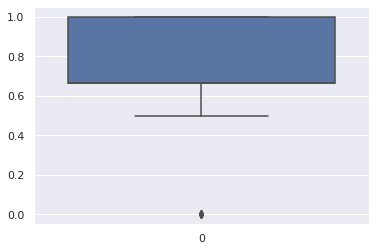

In [ ]:
idx = np.array(dtcf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda: ", dtcf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

En el siguiente codigo, se indica el máximo ***F1 para Negativo (clase negativa)*** obtenido en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***f1s (clase negativa)*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados. 

Mejor F1 para Positivo (clase positiva) promedio obtenido en la busqueda:  0.6633333333333334

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  True

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


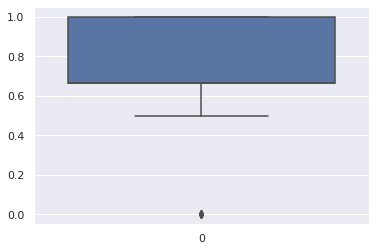

In [ ]:
idx = np.array(dtcf1p).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor F1 para Negativo (clase positiva) promedio obtenido en la busqueda: ", dtcf1p[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=f1pa)

####***E.6. Mejores hiperparametros según metrica de Área bajo la curva ROC (AUC)***

En el siguiente codigo, se indica la máxima ***Área bajo la curva ROC (AUC)*** obtenida en la busqueda anterior. Igualmente, se imprimen los ***hiperparametros*** con los que se logra alcanzar dicho valor. Por ultimo, se muestra el ***Boxplot*** de ***AUCs*** respectivo a la evaluación realizada con los ***hiperparametros*** especificados.  

Mejor AUC promedio obtenido en la busqueda:  0.8725

Mejores Hiperparametros obtenidos en la busqueda:
alpha:  1
fit_prior:  False

Boxplot de AUCs obtenidos en el cross-validation:


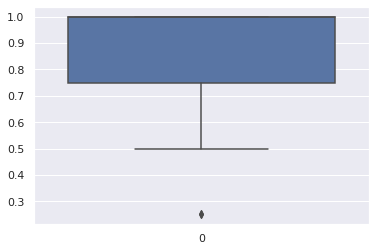

In [ ]:
idx = np.array(dtcauc).argsort()[-1] #Indice del mejor modelo
bestmodel = dtcmods[idx]
print("Mejor AUC promedio obtenido en la busqueda: ", dtcauc[idx], end="\n\n")
print("Mejores Hiperparametros obtenidos en la busqueda:")
print("alpha: ", bestmodel.get_params()['alpha'])
print("fit_prior: ", bestmodel.get_params()['fit_prior'])
acca, prepa, recpa, f1pa, prena, recna, f1na, auca = test_model_array(bestmodel, df, 50)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=auca)

####***E.7. Comparación y Síntesis***

En esta parte, se procedera a realizar la síntesis o resumen de los resultados obtenidos. Se empleara una comparación entre los mismos, con el objetivo de formular conclusiones apropiadas. La evaluación se desarrolla en base a distintas metricas. Entre ellas, cabe mencionar ***Exactitud, Precisión, Recall, F1 y Área bajo la curva ROC (AUC)***. Asimismo, tambien se usa el ***Promedio de métricas***, el cual constituye el promedio de los valores de todas las metricas mencionadas. Dicho promedio fue planteado con el objetivo de considerar la maximización de todas las metricas en la busqueda de los mejores hiperparametros. En la siguiente tabla, se presentan los ***hiperparametros*** que maximizan los valores de cada metrica. En ese sentido, ello permite identificar los mejores ***hiperparametros*** en base a que medida se desee optimizar. 

![alt text](https://i.ibb.co/5xFXKk9/03.png)

De acuerdo a lo observado en la tabla anterior, es posible concluir que el mejor valor para el ***hiperparametro Pesos*** es ***Uniform***, ya que este logro ser el mejor para todas las métricas consideradas. Asimismo, respecto a ***Numero de vecinos***, no hay un valor mayoritario como en el caso anterior. No obstante, en este tipo de casos, es importante elegir un metrica para basarse en ella y analizar lo obtenido respecto a ***boxplots*** y otros elementos estadisticos. En este caso, se selecciona ***F1*** como metrica de mayor relevancia. El ***Boxplot*** de ***F1*** para ***Positivo***, es decir para la clase positiva, posee sus valores distribuidos en valores altos, siendo su limite inferior ***0.5***. Igualmente, el ***Boxplot*** de ***F1*** para ***Negativo***, es decir para la clase negativa, tambien posee sus valores distribuidos en valores altos. El valor promedio de ***F1*** para ***Negativo*** no es tan alto, ya que presenta ***outliers*** en ***0.0***. Considerando la información dada anteriormente, se concluye que ***F1***, en este caso, es un metrica de decisión apropiada. ***14*** logro ser el mejor valor para el ***hiperparametro Numero de vecinos***, en el caso de ***F1*** para ***Positivo*** y ***F1*** para ***Negativo***. Por ultimo, para el ***hiperparametro Algoritmo***, se logra determinar ***Brute*** como el valor optimo, ya que este funciona mejor para la mayoria de metricas consideradas. Por lo tanto, se concluye que los ***hiperparametros*** que logran maximizar las metricas de forma conjunta y funcionan mejor con los datos son:

* ***alpha: 1***
* ***fit_prior: True***





##***2. Análisis de los mejores Clasificadores con Metricas de Desempeño***

In [ ]:
# Importar librerias:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import MultinomialNB

# Realizar prueba con los mejores Hiperparametros para el algoritmo de KNN:
bestknn = KNN(n_neighbors=14, weights='uniform', algorithm='brute')
knn_acc, knn_prep, knn_recp, knn_f1p, knn_pren, knn_recn, knn_f1n, knn_auc = test_model(bestknn, df, 50)
knn_acca, knn_prepa, knn_recpa, knn_f1pa, knn_prena, knn_recna, knn_f1na, knn_auca = test_model_array(bestknn, df, 50)

# Realizar prueba con los mejores Hiperparametros para el algoritmo de Arbol de Decisión:
bestdtc = DecisionTreeClassifier(max_depth=32, min_samples_split=0.6, min_samples_leaf=0.15, max_features='sqrt')
ad_acc, ad_prep, ad_recp, ad_f1p, ad_pren, ad_recn, ad_f1n, ad_auc = test_model(bestdtc, df, 50)
ad_acca, ad_prepa, ad_recpa, ad_f1pa, ad_prena, ad_recna, ad_f1na, ad_auca = test_model_array(bestdtc, df, 50)

# Realizar prueba con los mejores Hiperparametros para el algoritmo de Random Forest:
bestrfc = RFC(n_estimators=5, max_depth=2, max_features='log2', bootstrap=True)
rf_acc, rf_prep, rf_recp, rf_f1p, rf_pren, rf_recn, rf_f1n, rf_auc = test_model(bestrfc, df, 50)
rf_acca, rf_prepa, rf_recpa, rf_f1pa, rf_prena, rf_recna, rf_f1na, rf_auca = test_model_array(bestrfc, df, 50)

# Realizar prueba con los mejores Hiperparametros para el algoritmo de Regresión Logistica:
bestlr = LR(C=203, class_weight='balanced', solver='sag')
lr_acc, lr_prep, lr_recp, lr_f1p, lr_pren, lr_recn, lr_f1n, lr_auc = test_model(bestlr, df, 50)
lr_acca, lr_prepa, lr_recpa, lr_f1pa, lr_prena, lr_recna, lr_f1na, lr_auca = test_model_array(bestlr, df, 50)

# Realizar prueba con los mejores Hiperparametros para el algoritmo de Redes Bayesianas Multinomiales:
bestmnb = MultinomialNB(alpha=1, fit_prior=True)
mnb_acc, mnb_prep, mnb_recp, mnb_f1p, mnb_pren, mnb_recn, mnb_f1n, mnb_auc = test_model(bestmnb, dfn, 50)
mnb_acca, mnb_prepa, mnb_recpa, mnb_f1pa, mnb_prena, mnb_recna, mnb_f1na, mnb_auca = test_model_array(bestmnb, df, 50)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


####***A. Evaluación segun metrica de Exactitud (Accurancy)***

En las siguientes celdas de codigo, se indica la ***Exactitud (Accuracy)*** obtenida con la prueba anterior para todos los clasificadores. Cabe mencionar que se tuvieron en cuenta los mejores ***hiperparametros*** para el modelo. 

***En la siguiente celda de código se imprime la Exaxtitud obtenida con el mejor modelo del clasificador KNN.***

Exactitud (Accuracy) obtenida con mejor modelo de KNN: 0.7700000000000001

Boxplot de exactitudes obtenidas en el cross-validation:


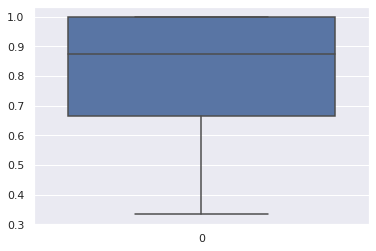

In [ ]:
print("Exactitud (Accuracy) obtenida con mejor modelo de KNN:", knn_acc)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=knn_acca)

**En la siguiente celda de código se imprime la Exaxtitud obtenida con el mejor modelo del clasificador de Árbol de Decesión**

Exactitud (Accuracy) obtenida con mejor modelo de Árbol de Decisión: 0.6366666666666666

Boxplot de exactitudes obtenidas en el cross-validation:


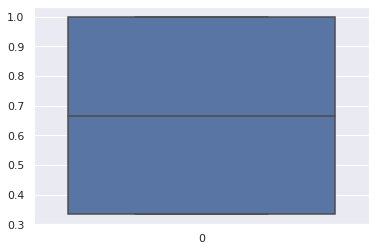

In [ ]:
print("Exactitud (Accuracy) obtenida con mejor modelo de Árbol de Decisión:", ad_acc)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=ad_acca)

**En la siguiente celda de código se imprime la Exaxtitud obtenida con el mejor modelo del clasificador de Random Forest**

Exactitud (Accuracy) obtenida con mejor modelo de Random Forest: 0.7883333333333334

Boxplot de exactitudes obtenidas en el cross-validation:


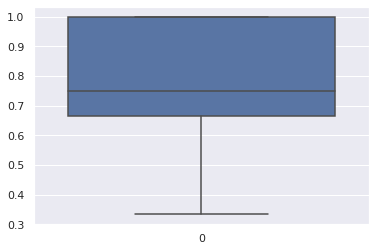

In [ ]:
print("Exactitud (Accuracy) obtenida con mejor modelo de Random Forest:", rf_acc)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=rf_acca)

**En la siguiente celda de código se imprime la Exaxtitud obtenida con el mejor modelo del clasificador de Regresiín Logidtica**

Exactitud (Accuracy) obtenida con mejor modelo de Regresión Logistica (Logistic Regression): 0.7833333333333333

Boxplot de exactitudes obtenidas en el cross-validation:


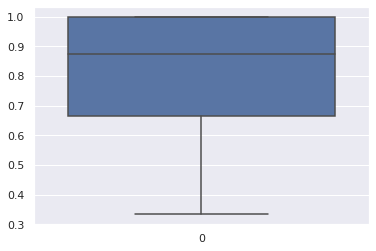

In [ ]:
print("Exactitud (Accuracy) obtenida con mejor modelo de Regresión Logistica (Logistic Regression):", lr_acc)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=lr_acca)

**En la siguiente celda de código se imprime la Exaxtitud obtenida con el mejor modelo del clasificador de Redes Bayesianas Multinomiales**

Exactitud (Accuracy) obtenida con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.7516666666666668

Boxplot de exactitudes obtenidas en el cross-validation:


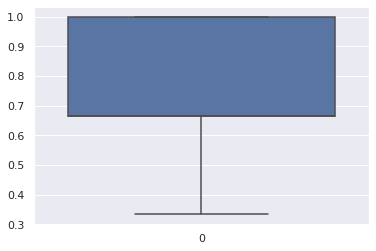

In [ ]:
print("Exactitud (Accuracy) obtenida con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_acc)
print()
print("Boxplot de exactitudes obtenidas en el cross-validation:")
sns.boxplot(data=mnb_acca)

####***B. Evaluación segun metrica de Precisión (Precision)***

En el siguiente codigo, se indica la ***Precisión (Precision)*** obtenida con la prueba anterior. Cabe mencionar que se tuvieron en cuenta los mejores ***hiperparametros*** para cada modelo. 

#####***B.1. Precisión para clase Positiva***

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para Valoracin Positiva (clase positiva) obtenida con mejor modelo de KNN: 0.8133333333333335

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


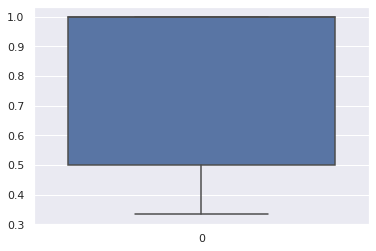

In [ ]:
print("Precisión (Precision) para Valoracin Positiva (clase positiva) obtenida con mejor modelo de KNN:", knn_prep)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=knn_prepa)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) Valoracin Positiva (clase positiva) obtenida con mejor modelo de Árbol de Decisión: 0.78

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


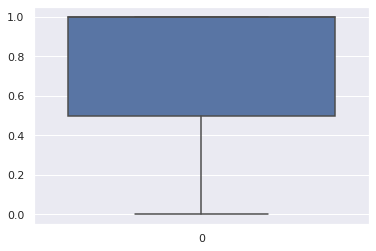

In [ ]:
print("Precisión (Precision) Valoracin Positiva (clase positiva) obtenida con mejor modelo de Árbol de Decisión:", ad_prep)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=ad_prepa)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) Valoracin Positivae (clase positiva) obtenida con mejor modelo de Random Forest: 0.7700000000000001

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


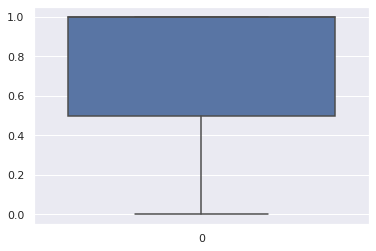

In [ ]:
print("Precisión (Precision) Valoracin Positivae (clase positiva) obtenida con mejor modelo de Random Forest:", rf_prep)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=rf_prepa)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) Valoracin Positiva (clase positiva) obtenida con mejor modelo de Regresión Logistica (Logistic Regression): 0.7866666666666668

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


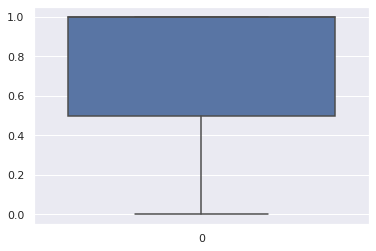

In [ ]:
print("Precisión (Precision) Valoracin Positiva (clase positiva) obtenida con mejor modelo de Regresión Logistica (Logistic Regression):", lr_prep)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=lr_prepa)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Redes Bayesianas Multinomiales. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para Fraude (clase positiva) obtenida con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.77

Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:


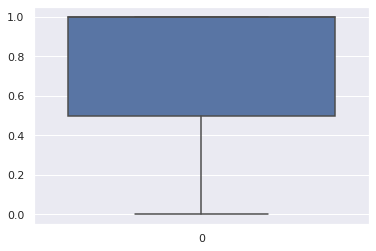

In [ ]:
print("Precisión (Precision) para Fraude (clase positiva) obtenida con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_prep)
print()
print("Boxplot de precisiónes (clase positiva) obtenidas en el cross-validation:")
sns.boxplot(data=mnb_prepa)

#####***B.2. Precisión para clase Negativa***

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de KNN: 0.7933333333333333

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


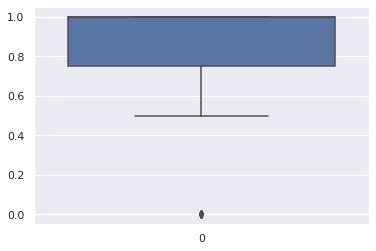

In [ ]:
print("Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de KNN:", knn_pren)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=knn_prena)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de Árbol de Decisión: 0.7

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


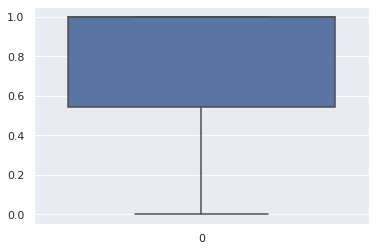

In [ ]:
print("Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de Árbol de Decisión:", ad_pren)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=ad_prena)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de Random Forest: 0.77

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


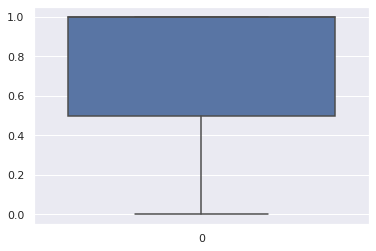

In [ ]:
print("Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de Random Forest:", rf_pren)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=rf_prena)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de Regresión Logistica (Logistic Regression): 0.7333333333333333

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


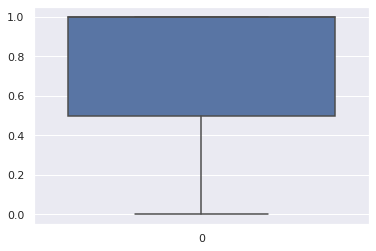

In [ ]:
print("Precisión (Precision) para Valoracin Negativa (clase negativa) obtenida con mejor modelo de Regresión Logistica (Logistic Regression):", lr_pren)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=lr_prena)

***En la siguiente celda de código se imprime la  Precisión obtenida con el mejor modelo del clasificador Redes Bayesianas Multinomiales. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Precisión (Precision) para No fraude (clase negativa) obtenida con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.75

Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:


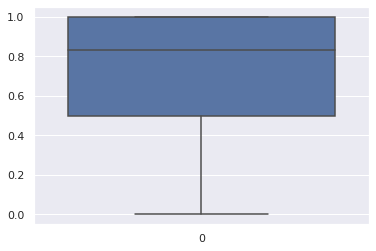

In [ ]:
print("Precisión (Precision) para No fraude (clase negativa) obtenida con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_pren)
print()
print("Boxplot de precisiónes (clase negativa) obtenidas en el cross-validation:")
sns.boxplot(data=mnb_prena)

####***C. Evaluación segun metrica de Recall***

En el siguiente codigo, se indica el ***Recall*** obtenido con la prueba anterior. Cabe mencionar que se tuvieron en cuenta los mejores ***hiperparametros*** para cada modelo. 

#####***C.1. Recall para clase Positiva***

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para Fraude (clase positiva) obtenido con mejor modelo de KNN: 0.88

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


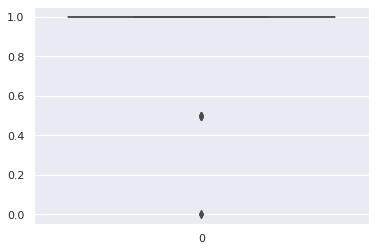

In [ ]:
print("Recall para Fraude (clase positiva) obtenido con mejor modelo de KNN:", knn_recp)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=knn_recpa)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para Fraude (clase positiva) obtenido con mejor modelo de Árbol de Decisión: 0.65

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


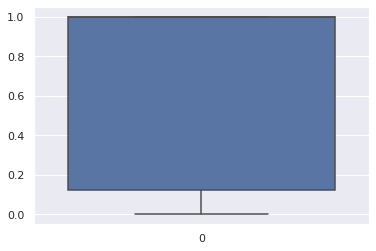

In [ ]:
print("Recall para Fraude (clase positiva) obtenido con mejor modelo de Árbol de Decisión:", ad_recp)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=ad_recpa)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para Fraude (clase positiva) obtenido con mejor modelo de Random Forest: 0.9

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


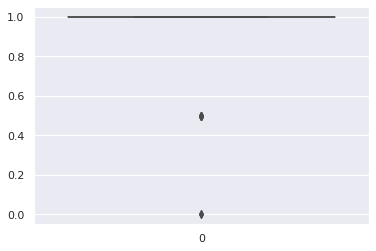

In [ ]:
print("Recall para Fraude (clase positiva) obtenido con mejor modelo de Random Forest:", rf_recp)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=rf_recpa)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para Fraude (clase positiva) obtenido con mejor modelo de Regresión Logistica (Logistic Regression): 0.9

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


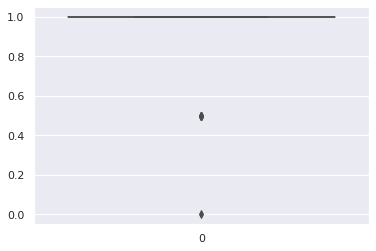

In [ ]:
print("Recall para Fraude (clase positiva) obtenido con mejor modelo de Regresión Logistica (Logistic Regression):", lr_recp)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=lr_recpa)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Redes Bayesianas Multinomiale. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para Fraude (clase positiva) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.77

Boxplot de recalls (clase positiva) obtenidos en el cross-validation:


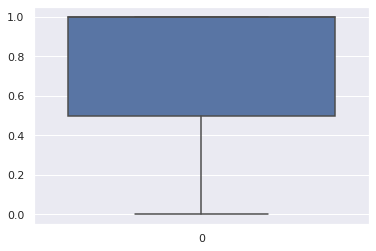

In [ ]:
print("Recall para Fraude (clase positiva) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_recp)
print()
print("Boxplot de recalls (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=mnb_recpa)

#####***C.2. Recall para clase Negativa*** 


***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para No fraude (clase negativa) obtenido con mejor modelo de KNN: 0.67

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


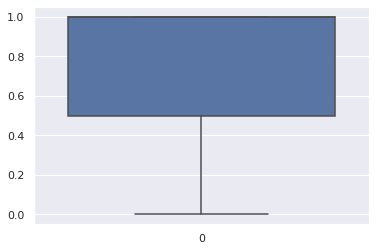

In [ ]:
print("Recall para No fraude (clase negativa) obtenido con mejor modelo de KNN:", knn_recn)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=knn_recna)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para No fraude (clase negativa) obtenido con mejor modelo de Árbol de Decisión: 0.72

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


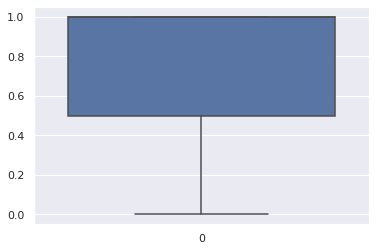

In [ ]:
print("Recall para No fraude (clase negativa) obtenido con mejor modelo de Árbol de Decisión:", ad_recn)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=ad_recna)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para No fraude (clase negativa) obtenido con mejor modelo de Random Forest: 0.69

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


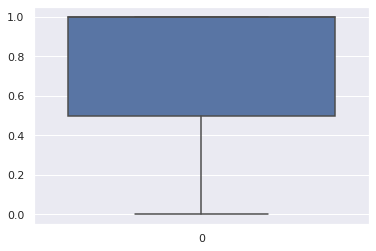

In [ ]:
print("Recall para No fraude (clase negativa) obtenido con mejor modelo de Random Forest:", rf_recn)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=rf_recna)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para No fraude (clase negativa) obtenido con mejor modelo de Regresión Logistica (Logistic Regression): 0.68

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


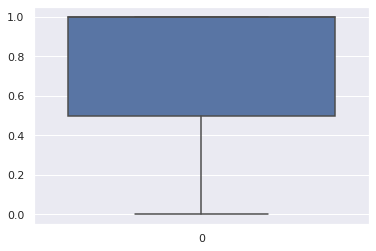

In [ ]:
print("Recall para No fraude (clase negativa) obtenido con mejor modelo de Regresión Logistica (Logistic Regression):", lr_recn)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=lr_recna)

***En la siguiente celda de código se imprime el Recall obtenido con el mejor modelo del clasificador Redes Bayesianas Multinomiales. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Recall para No fraude (clase negativa) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.85

Boxplot de recalls (clase negativa) obtenidos en el cross-validation:


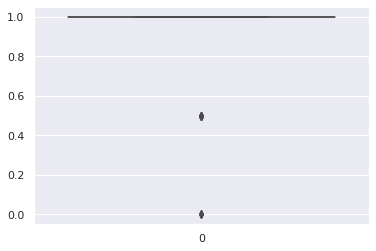

In [ ]:
print("Recall para No fraude (clase negativa) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_recn)
print()
print("Boxplot de recalls (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=mnb_recna)

####***D. Evaluación segun metrica de F1***

En el siguiente codigo, se indica el ***F1*** obtenido con la prueba anterior. Cabe mencionar que se tuvieron en cuenta los mejores ***hiperparametros*** para cada modelo.

#####***D.1. F1 para clase Positiva***

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para Fraude (clase positiva) obtenido con mejor modelo de KNN: 0.7933333333333334

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


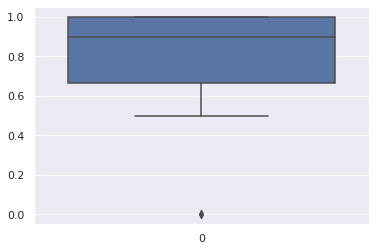

In [ ]:
print("F1 para Fraude (clase positiva) obtenido con mejor modelo de KNN:", knn_f1p)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=knn_f1pa)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para Fraude (clase positiva) obtenido con mejor modelo de Árbol de Decisión: 0.5606666666666668

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


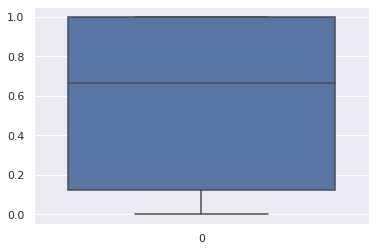

In [ ]:
print("F1 para Fraude (clase positiva) obtenido con mejor modelo de Árbol de Decisión:", ad_f1p)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=ad_f1pa)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para Fraude (clase positiva) obtenido con mejor modelo de Random Forest: 0.8033333333333332

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


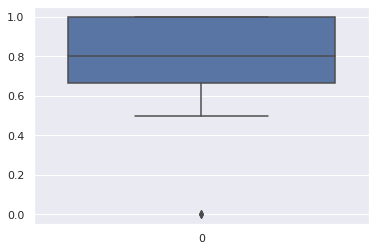

In [ ]:
print("F1 para Fraude (clase positiva) obtenido con mejor modelo de Random Forest:", rf_f1p)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=rf_f1pa)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para Fraude (clase positiva) obtenido con mejor modelo de Regresión Logistica (Logistic Regression): 0.81

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


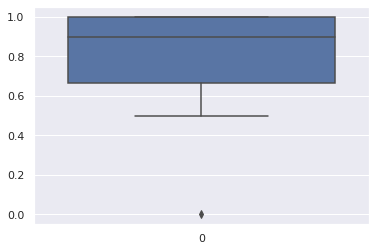

In [ ]:
print("F1 para Fraude (clase positiva) obtenido con mejor modelo de Regresión Logistica (Logistic Regression):", lr_f1p)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=lr_f1pa)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Redes Bayesianas Multinomiales. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para Fraude (clase positiva) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.7233333333333334

Boxplot de f1s (clase positiva) obtenidos en el cross-validation:


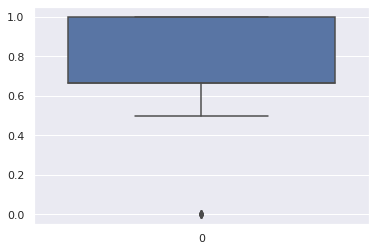

In [ ]:
print("F1 para Fraude (clase positiva) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_f1p)
print()
print("Boxplot de f1s (clase positiva) obtenidos en el cross-validation:")
sns.boxplot(data=mnb_f1pa)

#####***D.2. F1 para clase Negativa*** 


***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para No fraude (clase negativa) obtenido con mejor modelo de KNN: 0.6693333333333336

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


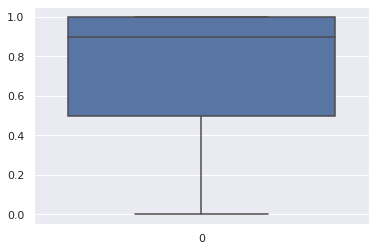

In [ ]:
print("F1 para No fraude (clase negativa) obtenido con mejor modelo de KNN:", knn_f1n)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=knn_f1na)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para No fraude (clase negativa) obtenido con mejor modelo de Árbol de Decisión: 0.5946666666666668

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


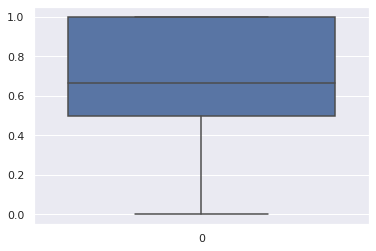

In [ ]:
print("F1 para No fraude (clase negativa) obtenido con mejor modelo de Árbol de Decisión:", ad_f1n)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=ad_f1na)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para No fraude (clase negativa) obtenido con mejor modelo de Random Forest: 0.7066666666666669

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


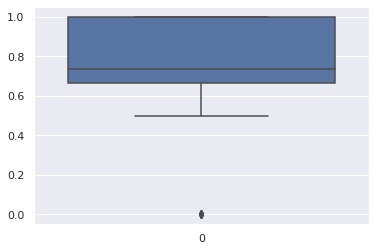

In [ ]:
print("F1 para No fraude (clase negativa) obtenido con mejor modelo de Random Forest:", rf_f1n)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=rf_f1na)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para No fraude (clase negativa) obtenido con mejor modelo de Regresión Logistica (Logistic Regression): 0.6860000000000003

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


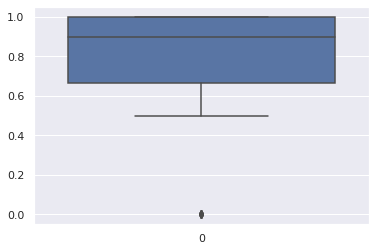

In [ ]:
print("F1 para No fraude (clase negativa) obtenido con mejor modelo de Regresión Logistica (Logistic Regression):", lr_f1n)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=lr_f1na)

***En la siguiente celda de código se imprime el F1 obtenido con el mejor modelo del clasificador Redes Bayesianas Multinomiales. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

F1 para No fraude (clase negativa) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.7493333333333334

Boxplot de f1s (clase negativa) obtenidos en el cross-validation:


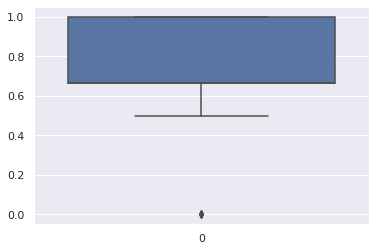

In [ ]:
print("F1 para No fraude (clase negativa) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_f1n)
print()
print("Boxplot de f1s (clase negativa) obtenidos en el cross-validation:")
sns.boxplot(data=mnb_f1na)

####***E. Evaluación segun metrica de Área bajo la curva ROC (AUC)***

En el siguiente codigo, se indica el ***Área bajo la Curva ROC (AUC)*** obtenida con la prueba anterior. Cabe mencionar que se tuvieron en cuenta los mejores ***hiperparametros*** para cada modelo. 

***En la siguiente celda de código se imprime el Área bajo la Curva ROC (AUC) obtenido con el mejor modelo del clasificador KNN. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Área bajo la Curva ROC (AUC) obtenido con mejor modelo de KNN: 0.79

Boxplot de AUCs obtenidos en el cross-validation:


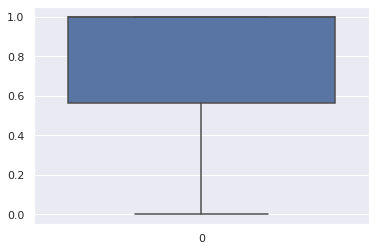

In [ ]:
print("Área bajo la Curva ROC (AUC) obtenido con mejor modelo de KNN:", knn_auc)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=knn_auca)

***En la siguiente celda de código se imprime el Área bajo la Curva ROC (AUC) obtenido con el mejor modelo del clasificador Árbol de Decisión. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Árbol de Decisión: 0.66

Boxplot de AUCs obtenidos en el cross-validation:


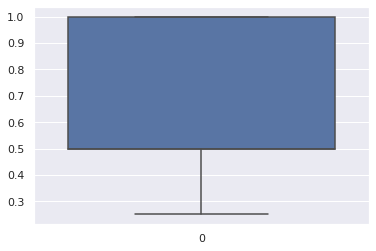

In [ ]:
print("Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Árbol de Decisión:", ad_auc)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=ad_auca)

***En la siguiente celda de código se imprime el Área bajo la Curva ROC (AUC) obtenido con el mejor modelo del clasificador Random Forest. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Random Forest: 0.8625

Boxplot de AUCs obtenidos en el cross-validation:


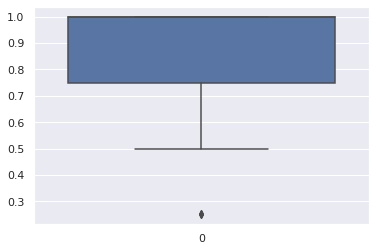

In [ ]:
print("Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Random Forest:", rf_auc)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=rf_auca)

***En la siguiente celda de código se imprime el Área bajo la Curva ROC (AUC) obtenido con el mejor modelo del clasificador Regresión Logistica. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Regresión Logistica (Logistic Regression): 0.8725

Boxplot de AUCs obtenidos en el cross-validation:


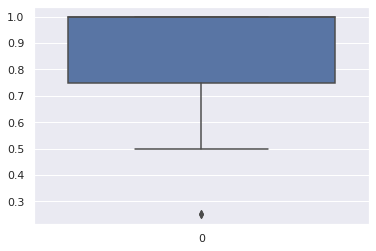

In [ ]:
print("Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Regresión Logistica (Logistic Regression):", lr_auc)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=lr_auca)

***En la siguiente celda de código se imprime el Área bajo la Curva ROC (AUC) obtenido con el mejor modelo del clasificador Redes Bayesianas Multinomiales. Asi mismo, se muestra el diagrama de caja obtenido con dicho algoritmo***

Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes): 0.8825

Boxplot de AUCs obtenidos en el cross-validation:


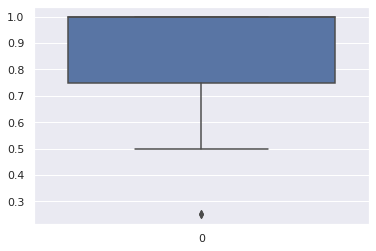

In [ ]:
print("Área bajo la Curva ROC (AUC) obtenido con mejor modelo de Redes Bayesianas Multinomiales (Multinomial Naive Bayes):", mnb_auc)
print()
print("Boxplot de AUCs obtenidos en el cross-validation:")
sns.boxplot(data=mnb_auca)

####***F. Comparación y Síntesis***

En esta sección, se procede con la construcción de la síntesis o resumen de los resultados obtenidos para cada modelo. Se empleara una comparación entre los mismos, con el objetivo de plantear conclusiones apropiadas. La comparativa se desarrolla en base a una serie de metricas. Entre ellas, cabe mencionar ***Exactitud, Precisión, Recall, F1*** y ***Área bajo la curva ROC (AUC)***. Siguiendo en este razonamiento, se procede a mostrar una tabla, la cual indica los valores de las ***metricas de evaluación*** obtenidos por el ***mejor modelo*** de cada algoritmo de aprendizaje supervisado analizado. Esta tabla es formulada con el objetivo de resaltar las limitaciones y ventajas de cada modelo de forma comparativa. Es importante resaltar que un ***mejor modelo*** de un clasificador, es aquel que cuenta con los mejores ***hiperparametros*** encontrados para el mismo. 

![Tabla comparativa de modelos](https://i.ibb.co/jWRD7MC/01.png)





De acuerdo a lo observado en la tabla anterior, es factible reconocer que el ***mejor modelo*** de ***Random Forest*** logra obtener mejor ***performance*** que el resto de modelos en base a ***2 metricas***, las cuales son ***Exactitud y Recall para valoración negativa***. Por otra parte, se logra observar que el ***mejor modelo*** de ***Multinomial Naive Bayes*** alcanza un mejor valor de ***AUC*** que el resto de modelos evaluados. Teniendo ello en cuenta, se procedera a listar cada ***metrica de evaluación***, realizando la comparativa entre modelos respectiva:

* ***Random Forest (mejor modelo)*** logra obtener una mejor ***Exactitud***, con un valor de ***78.83%***, en comparación a los ***77.00%***, ***63.66%***, ***78.33%*** y ***75.16%*** obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, ***Logistic Regression (mejor modelo)*** y ***Multinomial Naive Bayes (mejor modelo)*** respectivamente.

* ***KNN (mejor modelo)*** logra obtener una mejor ***Precisión valoración Positiva***, con un valor de ***81.33%***, en comparación a los ***78.00%***, ***77.00%***, ***78.66%*** y ***77.00%*** obtenidos por ***Árbol de Decisión (mejor modelo)***, ***Random Forest (mejor modelo)***, ***Logistic Regression (mejor modelo)*** y ***Multinomial Naive Bayes (mejor modelo)*** respectivamente.

* ***KNN (mejor modelo)*** logra obtener una mejor ***Precisión para valoración Negativa***, con un valor de ***79.33%***, en comparación a los ***70.00%***, ***77.00%***, ***73.33%*** y ***75.00%*** obtenidos por ***Árbol de Decisión (mejor modelo)***, ***Random Forest (mejor modelo)***, ***Logistic Regression (mejor modelo)*** y ***Multinomial Naive Bayes (mejor modelo)*** respectivamente.

* ***Random Forest (mejor modelo)*** y  ***Logistic Regression (mejor modelo)*** lograron obtener un mejor ***Recall para valoración Positiva***, con un valor de ***90.00%***, en comparación a los ***88.00%***, ***65.00%*** y ***77.00%***, obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, y ***Multinomial Naive Bayes (mejor modelo)*** respectivamente.

* ***Multinomial Naive Bayes (mejor modelo)*** logra obtener un mejor ***Recall para Valoracion Negativa***, con un valor de ***85.00%***, en comparación a los ***67.00%***, ***72.00%***, ***69.00%*** y ***68.00%*** obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, ***Random Forest (mejor modelo)*** y ***Logistic Regression (mejor modelo)*** y respectivamente.

* ***Logistic Regression (mejor modelo)*** logra obtener un mejor ***F1 para valoración Positiva***, con un valor de ***81.00%***, en comparación a los ***79.33%***, ***56.06%***, ***80.33%*** y ***72.33%*** obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, ***Random Forest (mejor modelo)*** y ***Multinomial Naive Bayes (mejor modelo)*** y respectivamente.

* ***Multinomial Naive Bayes (mejor modelo)*** logra obtener un mejor ****F1 para valoración Negativa***, con un valor de ***74.93%***, en comparación a los ***66.93%***, ***59.46%***, ***70.66%*** y ***68.60%*** obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, ***Random Forest (mejor modelo)*** y ***Logistic Regression (mejor modelo)*** y respectivamente.

* ***Random Forest (mejor modelo)*** logra obtener una mejor ***Área bajo la curva ROC***, con un valor de ***99.61%***, en comparación a los ***99.48%***, ***98.79%***, ***99.23%***, ***95.67%*** y ***86.12%*** obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, ***SVM (mejor modelo)***, ***Logistic Regression (mejor modelo)*** y ***Multinomial Naive Bayes (mejor modelo)*** respectivamente.

* ***Multinomial Naive Bayes (mejor modelo)*** logra obtener un mejor ***Área bajo la curva ROC***, con un valor de ***88.25%***, en comparación a los ***79.00%***, ***66.00%***, ***86.00%*** y ***87.25%*** obtenidos por ***KNN (mejor modelo)***, ***Árbol de Decisión (mejor modelo)***, ***Random Forest (mejor modelo)*** y ***Logistic Regression (mejor modelo)*** y respectivamente.



Como se puede observar, para la mayoria de metricas, ***Multinomial Naive Bayes (mejor modelo)*** logra obtener los mejores resultados en muchas de las metricas. Sin embargo, ***Logistic Regression (mejor modelo)*** y ***Random Forest (mejor modelo)*** consiguieron ser los mejores modelos en las otras metricas. Para ***AUC***, la diferencia de desempeño entre los clasificadores mencionados es ligeramente superior a ***2.0%***. Sin embargo, la diferencia de desempeño entre ***Multinomial Naive Bayes (mejor modelo)*** y ***Logistic Regression (mejor modelo)*** es poco significativa como para afirmar contundentemente la superioridad de uno de estos. 

Por otro lado, tambien es importante argumentar respecto a ***1 metrica*** en especifico para identificar el mejor clasificador. En ese sentido, dicha metrica sera ***F1***. ***Random Forest (mejor modelo)***  y ***Logistic Regression (mejor modelo)*** consiguen los mejores  resultados para esta metrica. Tanto para ***F1 para valoraciónes Positivas*** como para ***F1 para valoraciónes Negativas***. ***Random Forest (mejor modelo)*** consigue un desempeño de ***80.33%*** y ***70.60%*** en F1. Mientras que, ***Logistic Regression (mejor modelo)*** consigue un desempeño de ***81.00%*** y ***68.60%*** en F1. Teniendo en cuenta las variaziones que se encuentran entre los resultados de los 2 modelos, y los resultados presentes en las otras metricas de desempeño se concluye que el mejor algoritmo de clasificación es ***Random Forest (mejor modelo)***. En ese sentido, se reporta lo siguiente:

* ***Los mejor modelos encontrados para el conjunto de datos estan basados en Random Forest***.

Asimismo, los siguientes ajustes de ***hiperparametros*** son los más apropiados para los modelos planteados:

* ***Para Random Forest:***
  * ***Numero de estimadores (n_estimators):  5***
  * ***Profundidad maxima (max_depth):  2***
  * ***max_features: Logartmo (log2)***
  * ***bootstrap:  True***

***Conclusión: En base a los resultados planteados, se puede afirmar la superioridad de uno del clasificador Random Forest para abordar este problema y este dataset.***